# 기계학습(Machine Learning) 알고리즘

## 정규화 방법론(Regularized Method, Penalized Method, Contrained Least Squares)

> **"선형회귀 계수(Weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법"**  
> **"과최적화는 계수 크기를 과도하게 증가하는 경향이 있기에, 정규화 방법에서의 제약 조건은 일반적으로 계수의 크기를 제한하는 방법"**  

### 정규화 회귀분석 알고리즘

**0) Standard Regression:** 

<center>
$\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2\Biggr]$
</center>


**1) Ridge Regression:**  
- **정규화조건/패널티/제약조건:** 추정계수의 제곱합을 최소로 하는 것 

\begin{align*}
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \beta_i^2\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}

- **하이퍼파라미터($\lambda$):** 기존의 잔차 제곱합과 추가 제약 조건의 비중을 조절하기 위한 하이퍼모수(hyperparameter)  
    - $\lambda$=0: 일반적인 선형 회귀모형(OLS)  
    - $\lambda$를 크게 두면 정규화(패널티) 정도가 커지기 때문에 가중치($\beta_i$)의 값들이 커질 수 없음(작아짐)  
    - $\lambda$를 작게 두면 정규화(패널티) 정도가 작아 지기 때문에 가중치($\beta_i$)의 값들의 자유도가 높아져 커질 수 있음(커짐) 


**2) Lasso(Least Absolute Shrinkage and Selection Operator) Regression:**  
- **정규화조건/패널티/제약조건:** 추정계수의 절대값 합을 최소로 하는 것

\begin{align*}
\hat{\beta} = arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda \displaystyle \sum_{i=0}^k \left|\beta_i \right|\Biggr] \\ where~\lambda~is~hyper~parameter(given~by~human)
\end{align*}

<center><img src='Image/Ridge_Lasso.png' width='600'></center> 


**3) Elastic Net:**  
- **정규화조건/패널티/제약조건:** 추정계수의 절대값 합과 제곱합을 동시에 최소로 하는 것

\begin{align*}
\hat{\beta} &= arg\underset{\hat{\beta}}{min} \Biggl[\displaystyle \sum_{j=1}^t \Bigl(y_j - \displaystyle \sum_{i=0}^k \beta_i x_{ij}\Bigr)^2 + \lambda_1 \displaystyle \sum_{i=0}^k \left|\beta_i \right| + \lambda_2 \displaystyle \sum_{i=0}^k \beta_i^2\Biggr] \\ &where~\lambda_1~and~\lambda_2~are~hyper~parameters(given~by~human)
\end{align*}

### 하이퍼파라미터 특성 및 요약

- **최적 정규화(최적 하이퍼파라미터 추정):** 하이퍼파라미터(Hyperparameter)에 따른 검증성능 차이 존재
    - **Train Set:** 하이퍼파라미터가 작으면 작을수록 좋아짐(과최적화)
    - **Test Set:** 하이퍼파라미터가 특정한 범위에 있을때 좋아짐(추정필요)


- **Summary**  

> - **Standard:** 
    <center><img src='Image/Regression_Result_Standard.png' width='400'></center>  
> - **Ridge:** 
    - 알고리즘이 모든 변수들을 포함하려 하기 때문에 계수의 크기가 작아지고 모형의 복잡도가 줄어듬  
    - 모든 변수들을 포함하려 하므로 변수의 수가 많은 경우 효과가 좋지 않으나 과적합(Overfitting)을 방지하는데 효과적  
    - 다중공선성이 존재할 경우, 변수 간 상관관계에 따라 계수로 다중공선성이 분산되기에 효과가 높음  
    <center><img src='Image/Regression_Result_Ridge1.png' width='400'><img src='Image/Regression_Result_Ridge2.png' width='400'></center>   
> - **LASSO:**  
    - 알고리즘이 최소한의 변수를 포함하여 하기 때문의 나머지 변수들의 계수는 0이됨 (Feature Selection 기능)  
    - 변수선택 기능이 있기에 일반적으로 많이 사용되는 이점이 있지만 특정변수에 대한 계수가 커지는 단점 존재  
    - 다중공선성이 존재할 경우, 특정 변수만을 선택하는 방식이라 **Ridge**에 비해 다중공선성 문제에 효과가 낮음  
    <center><img src='Image/Regression_Result_Lasso1.png' width='400'><img src='Image/Regression_Result_Lasso2.png' width='400'></center>
> - **Elastic Net:**  
    - 큰 데이터셋에서 Ridge와 LASSO의 효과를 모두 반영하기에 효과가 좋음 (적은 데이터셋은 효과 낮음)  
    <center><img src='Image/Regression_Result_EN.png' width='400'></center>  
    
- **파라미터 세팅(실습)**
    > **1) "statsmodels":** 선형 회귀모형 클래스의 fit_regularized 메서드를 사용하여 Ridge/LASSO/Elastic Net 계수 추정
    - **Ridge:** 
    <center>
    $\lambda_1 = 0,~~0 < \lambda_2 < 1 \\ => L_1 = 0,~~alpha \ne 0$
    </center>
    - **LASSO:** 
    <center>
    $0 < \lambda_1 < 1,~~\lambda_2 = 0 \\ => L_1 = 1,~~alpha \ne 0$
    </center>
    - **Elastic Net:** 
    <center>
    $0 < (\lambda_1, \lambda_2) < 1 \\ => 0 < L_1 < 1,~~alpha \ne 0$
    </center>
    
    > **2) "sklearn":** 정규화 회귀모형을 위한 Ridge, Lasso, ElasticNet 별도 클래스 제공
    - [**Ridge:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
    <center>
    $0 < (\lambda = alpha) < 1$
    </center>
    - [**LASSO:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
    <center>
    $0 < (\lambda = alpha) < 1$
    </center>
    - [**Elastic Net:**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
    <center>
    $0 < (\lambda_1, \lambda_2) < 1 \\ => 0 < L_1 < 1,~~alpha \ne 0$
    </center>
    
~~~
# Ridge
fit = Ridge(alpha=0.5, fit_intercept=True, normalize=True, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# LASSO
fit = Lasso(alpha=0.5, fit_intercept=True, normalize=True, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# Elastic Net
fit = ElasticNet(alpha=0.01, l1_ratio=1, fit_intercept=True, normalize=True, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)
~~~

### 실습

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
print('Data View')
display(pd.concat([pd.DataFrame(y, columns=['diabetes_value']), pd.DataFrame(X, columns=diabetes.feature_names)], axis=1).head())

In [ ]:
alpha_weight = 0.5
fit = Ridge(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])

In [ ]:
alpha_weight = 0.5
fit = Lasso(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])

In [ ]:
result_Ridge = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    fit = Ridge(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
    result_coef = pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])
    result_Ridge = pd.concat([result_Ridge, result_coef], axis=1)
   
result_LASSO = pd.DataFrame()
alpha_candidate = np.hstack([0, np.logspace(-2, 1, 4)])
for alpha_weight in alpha_candidate:
    fit = Lasso(alpha=alpha_weight, fit_intercept=True, normalize=True, random_state=123).fit(X, y)
    result_coef = pd.DataFrame(np.hstack([fit.intercept_, fit.coef_]), columns=['alpha = {}'.format(alpha_weight)])
    result_LASSO = pd.concat([result_LASSO, result_coef], axis=1)
    
result_Ridge.plot(figsize=(10,10), legend=True, ax=plt.subplot(211))
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.grid()
result_LASSO.plot(legend=True, ax=plt.subplot(212))
plt.title('LASSO')
plt.xlabel('Columns')
plt.ylabel('coefficients')
plt.legend(fontsize=13)
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
result_Ridge.T.plot(figsize=(10,10), legend=False, ax=plt.subplot(211))
plt.title('Ridge')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.grid()
result_LASSO.T.plot(legend=False, ax=plt.subplot(212))
plt.title('LASSO')
plt.xticks(np.arange(len(result_Ridge.columns)), [i for i in result_Ridge.columns])
plt.ylabel('coefficients')
plt.tight_layout()
plt.grid()
plt.show()

## 회귀분석 알고리즘 정리

- **변수 세팅에 따른 분류:**

<center><img src='Image/Regression-Algorithms-Tree1.png' width='800'></center> 

- **문제 해결에 따른 분류:**

<center><img src='Image/Regression-Algorithms-Tree2.png' width='800'></center> 

## Bagging and Boosting 모델

### 편향-분산 상충관계(Bias-variance Trade-off)  

**1) 편향과 분산의 정의**
> **(비수학적 이해)**
- **편향(Bias):** 점추정  
    - 예측값과 실제값의 차이  
    - 모델 학습시 여러 데이터로 학습 후 예측값의 범위가 정답과 얼마나 멀리 있는지 측정  
- **편향(Bias(Real)):** 모형화(단순화)로 미처 반영하지 못한 복잡성  
    <U>=> 편향이 작다면 Training 데이터 패턴(복잡성)을 최대반영 의미</U>  
    <U>=> 편향이 크다면 Training 데이터 패턴(복잡성)을 최소반영 의미</U>  
- **분산(Variance):** 구간추정  
    - 학습한 모델의 예측값이 평균으로부터 퍼진 정도(변동성/분산)  
    - 여러 모델로 학습을 반복한다면, 학습된 모델별로 예측한 값들의 차이를 측정
- **분산(Variance(Real)):** 다른 데이터(Testing)를 사용했을때 발생할 변화  
    <U>=> 분산이 작다면 다른 데이터로 예측시 적은 변동 예상</U>  
    <U>=> 분산이 크다면 다른 데이터로 예측시 많은 변동 예상</U>  
    
<center><img src='Image/Bias_Variance1.jpeg' width='400'></center>

> **(수학적 이해)**

\begin{align*}
\text{Equation of Error} && Err(x) &= E\Bigl[\bigl(Y-\hat{f}(x)\bigr)^2 \Bigr] \\
&& &= \Bigl(E[\hat{f}(x)] - f(x)\Bigr)^2 + E \Bigl[\bigl(\hat{f}(x) - E[\hat{f}(x)]\bigr)^2 \Bigr] + \sigma_{\epsilon}^2 \\
&& &= \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\end{align*}

**2) 편향과 분산의 관계**
- **모델의 복잡도가 낮으면 Bias가 증가하고 Variance가 감소(Underfitting)**  
: 구간추정 범위는 좁으나 점추정 정확성 낮음  
: Training/Testing 모두 예측력이 낮음
- **모델의 복잡도가 높으면 Bias가 감소하고 Variance가 증가(Overfitting)**  
: 점추정 정확성은 높으나 구간추정 범위는 넓음  
: Training만 잘 예측력 높고 Testing은 예측력 낮음  
- **Bias와 Variance가 최소화 되는 수준에서 모델의 복잡도 선택**  

<center><img src='Image/Bias-Variance-Tradeoff.png' width='400'></center>
<center><img src='Image/Bias_Variance4.png' width='400'></center>

**3) 편향과 분산 모두를 최소화하는 방법**
<center><img src='Image/Bias_Variance_Reduce.png' width='600'></center>

### Bagging vs Boosting

<center><img src='Image/Bagging_Boosting.png' width='700'></center> 

| - | Bagging | Boosting |
|-------------|---------------------------------------|-----------------------------------------|
| 특징 | 병렬 앙상블 모델(각 모델은 서로 독립) | 연속 앙상블 모델(이전 모델의 오류 반영) |
| 목적 | Variance 감소 | Bias 감소 |
| 적합한 상황 | Low Bias + High Variance | High Bias + Low Variance |
| Sampling | Random Sampling | Random Sampling with weight on error |

### Bagging 알고리즘

- **의사결정나무(Decision Tree):**  

<center><img src='Image/Bagging_DT.png' width='700'></center> 

- **렌덤포레스트(Random Forest):** 의사결정나무의 CLT버전

<center><img src='Image/Bagging_RF.jpg' width='700'></center> 

~~~
# DecisionTree
fit = DecisionTreeRegressor().fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# RandomForestRegressor
fit = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)
~~~

### Boosting 알고리즘

- **Gradient Boosting Machine(GBM):** 정규화된 GBM이라고하며, GMB보다 10배 빠른 알고리즘  

<center><img src='Image/Boosting_GBM.jpg' width='600'></center> 

- **XGBoost(eXtreme Gradient Boosting):** 높은 예측력으로 많은 양의 데이터를 다룰 때 사용되는 부스팅 알고리즘  

<center><img src='Image/Boosting_XGBoost.png' width='600'></center> 

- **LightGBM:** 현존하는 부스팅 알고리즘 중 가장 빠르고 높은 예측력 제공

<center><img src='Image/Boosting_LightGBM.png' width='600'></center> 

| Algorithms | Specification | Others |
|------------|-------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| AdaBoost | 다수결을 통한 정답분류 및 오답에 가중치 부여 | - |
| GBM | 손실함수(검증지표)의 Gradient로 오답에 가중치 부여 | - |
| XGBoost | GMB대비 성능향상<br/>시스템(CPU, Mem.) 자원 효율적 사용 | 2014년 공개 |
| LightGBM | XGBoost대비 성능향상 및 자원소모 최소화<br/>XGBoost가 처리하지 못하는 대용량 데이터 학습가능<br/>근사치분할(Approximates the Split)을 통한 성능향상 | 2016년 공개 |

~~~
# GradientBoostingRegression
fit = GradientBoostingRegressor(alpha=0.1, learning_rate=0.05, loss='huber', criterion='friedman_mse',
                                           n_estimators=1000, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# XGBoost
fit = XGBRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

# LightGMB
fit = LGBMRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train, Y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)
~~~

# 시계열 알고리즘

<center><img src='Image/TS_Algorithm_Concept.png' width='800'></center> 

## 비정상성(Non-stationary)의 정상성(Stationary) 변환

> - **목적: 정상성 확보를 통해 안정성이 높아지고 예측력 향상**
> - **장점: 절약성 원칙(Principle of Parsimony)에 따라 적은 모수만으로 모델링 가능하기에 과적합 확률이 줄어듬**
> - **방법: 제곱, 루트, 로그, 차분 등**

    
- **이론예시:**
<center><img src='Image/Stationary_Example.png' width='800'></center> 
    
    - Trend: a/c/e/f/i  
    - Seasonality: d/h/i  
    - Cycle: g
    - Non-constant Variance: i  

**1) 로그변환(Logarithm Transform):** 
> - 시간흐름에 비례하여 값이 커지는 경우(분산 증가)
> - 비정상 확률 과정으로 표준편차가 자료의 크기에 비례하여 증가하거나 지수함수적으로 증가하는 경우 
> - 로그 변환한 확률 과정의 분산은 일정하기에 추세 제거로 기댓값이 0이 되면 정상 과정으로 모형화 가능

\begin{align*}
\text{Distribution of Original} && \text{E}(Y_t) &= \mu_t = f(t) \\
&& \sqrt{\text{Var}(Y_t)} &= \mu_t \sigma \\
\text{Distribution of Log-transform} && Y_t &= Y_{t-1} + Y_t - Y_{t-1} \\
&& \dfrac{Y_t}{Y_{t-1}} &= 1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(\dfrac{Y_t}{Y_{t-1}}) &= log(1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}}) \approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) - log(Y_{t-1}) &\approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(Y_{t-1}) + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(\mu_t) + \dfrac{Y_t - \mu_t}{\mu_t} \\
&& \text{E}(\log Y_t) &= \log \mu_t \\
&& \text{Var}(\log Y_t) &\approx \sigma^2 \\
\text{*Generalization of Return} && R_t &= \dfrac{Y_{t}}{Y_{t-1}} - 1 \\
&& \log{Y_t} - \log{Y_{t-1}} &= \log{R_t + 1} \approx R_t \;\; \text{ if } \left| R_t \right| < 0.2 \\
\end{align*}

**2) 차분(Difference):** 특정 시점 또는 시점들의 데이터가 발산할 경우 시점간 차분(변화량)으로 정상성 변환 가능
- **계절성(Seasonality, $S_t$)**: 특정한 달/요일에 따라 기대값이 달라지는 것, 변수 더미화를 통해 추정 가능
> - **계절성 제거: 1) 계절성 추정($f(t)$) 후 계절성 제거를 통한 정상성 확보 (수학적 이해)**
    - 확률과정의 계절변수 더미화를 통해 기댓값 함수를 알아내는 것
    - 확률과정($Y_t$)이 추정이 가능한 결정론적 계절성함수($f(t)$)와 정상확률과정($Y^s_t$)의 합
    
    \begin{align*}
    \text{Main Equation} && Y_t &= f(t) + Y^s_t \\
    \text{where} && f(t) &= \sum_{i=0}^{\infty} a_i D_i = a_0 + a_1 D_1 + a_2 D_2 + \cdots
    \end{align*}
> - **계절성 제거: 2) 차분 적용 $(1-L^d) Y_t$ 후 계절성 제거를 통한 정상성 확보 (수학적 이해)**

    \begin{align*}
    \text{Main Equation of d=1} && Y_t &=> (1-L^1) Y_t \\
    && &= (1-Lag^1) Y_t \\
    && &= Y_t - Lag^1(Y_t) \\
    && &= Y_t - Y_{t-1} \\
    \text{Main Equation of d=2} && Y_t &=> (1-L^2) Y_t \\
    && &= (1-Lag^2) Y_t \\
    && &= Y_t - Lag^2(Y_t) \\
    && &= Y_t - Y_{t-2} \\
    \end{align*}


- **추세(Trend, $T_t$)**: 시계열이 시간에 따라 증가, 감소 또는 일정 수준을 유지하는 경우  
> - **추세 제거: 1) 추세 추정($f(t)$) 후 추세 제거를 통한 정상성 확보 (수학적 이해)** 
    - 확률과정의 결정론적 기댓값 함수를 알아내는 것
    - 확률과정($Y_t$)이 추정이 가능한 결정론적 추세함수($f(t)$)와 정상확률과정($Y^s_t$)의 합
    
    \begin{align*}
    \text{Main Equation} && Y_t &= f(t) + Y^s_t \\
    \text{where} && f(t) &= \sum_{i=0}^{\infty} a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots
    \end{align*}
> - **추세 제거: 2) 차분 적용 $(1-L^1)^d Y_t$ 후 추세 제거를 통한 정상성 확보 (수학적 이해)**

    \begin{align*}
    \text{Main Equation of d=1} && Y_t &=> (1-L^1)^1 Y_t \\
    && &= (1-Lag^1)^1 Y_t \\
    && &= Y_t - Lag^1(Y_t) \\
    && &= Y_t - Y_{t-1} \\
    \text{Main Equation of d=2} && Y_t &=> (1-L^1)^2 Y_t \\
    && &= (1-2L^1+L^2) Y_t \\
    && &= (1-2Lag^1+Lag^2) Y_t \\
    && &= Y_t - 2Lag^1(Y_t) + Lag^2(Y_t) \\
    && &= Y_t - Lag^1(Y_t) - Lag^1(Y_t) + Lag^2(Y_t) \\
    && &= (Y_t - Lag^1(Y_t)) - (Lag^1(Y_t) - Lag^2(Y_t)) \\
    && &= (Y_t - L^1(Y_t)) - (L^1(Y_t) - L^2(Y_t)) \\
    && &= (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2}) \\
    && &= Y_t - 2Y_{t-1} + Y_{t-2} \\
    \end{align*}

**3) Box-Cox 변환:** 정규분포가 아닌 자료를 정규분포로 변환하기 위해 사용
> - 모수(parameter) $\lambda$를 가지며, 보통 여러가지 $\lambda$ 값을 시도하여 가장 정규성을 높여주는 값을 사용

\begin{align*}
y^{(\boldsymbol{\lambda})} =
\begin{cases}
\dfrac{y^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\ln{y} & \text{if } \lambda = 0,
\end{cases}
\end{align*}

### 정상성 테스트 방향

> **추세와 계절성 모두 제거된 정상성 데이터 변환 필요!**
>> - **ADF 정상성 확인 -> 추세 제거 확인 Measure**  
: ADF 검정통계량은 정상이라고 해도 데이터에 계절성이 포함되면 ACF의 비정상 Lag 존재하는 비정상데이터 가능  

>> - **KPSS 정상성 확인 -> 계절성 제거 확인 Measure**  
: KPSS 검정통계량은 정상이라고 해도 데이터에 추세가 포함되면 ACF의 비정상 Lag 존재하는 비정상데이터 가능  


### 실습: 대기중 CO2농도 추세 제거

In [17]:
# 라이브러리 및 데이터 로딩
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

raw_set = datasets.get_rdataset("CO2", package="datasets")
raw = raw_set.data

,time,value
0,"1,959.00",315.42
1,"1,959.08",316.31
2,"1,959.17",316.50
3,"1,959.25",317.56
4,"1,959.33",318.13


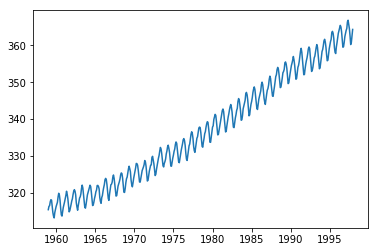

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:30:38   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2249.7742     21.268   -105.784      0.000   -2291.566   -2207.982
time           1.3075      0.011    121.634      0.000       1.286       1.329
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.798
Skew:                           0.048   Prob(JB):                       0.0203
Kurtosis:                       2.375   Cond. No.                     3.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

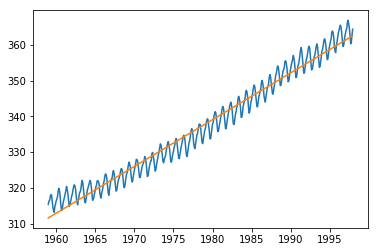

In [18]:
# 데이터 확인 및 추세 추정 (선형)
display(raw.head())
plt.plot(raw.time, raw.value)
plt.show()

result = sm.OLS.from_formula(formula='value~time', data=raw).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * raw.time
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

,time,value
0,"1,959.00",315.42
1,"1,959.08",316.31
2,"1,959.17",316.50
3,"1,959.25",317.56
4,"1,959.33",318.13


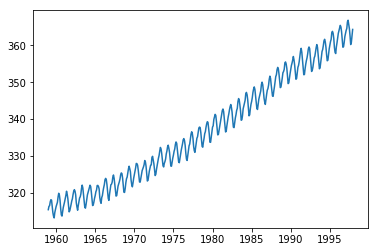

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:30:39   Log-Likelihood:                -1027.8
No. Observations:                 468   AIC:                             2062.
Df Residuals:                     465   BIC:                             2074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.77e+04   3482.902     13.696      0.000    4.09e+04    5.45e+04
time           -49.1907      3.521    -13.971      0.000     -56.110     -42.272
I(time ** 2)     0.0128      0.001     14.342      0.000       0.011       0.015
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.850
Skew:                          -0.116   Prob(JB):                     0.000133
Kurtosis:                       2.072   Cond. No.                     1.35e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

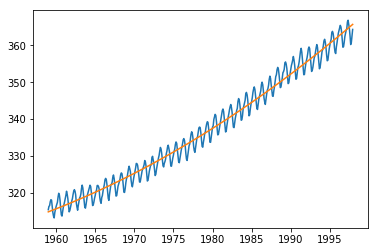

In [19]:
# 데이터 확인 및 추세 추정 (비선형)
display(raw.head())
plt.plot(raw.time, raw.value)
plt.show()

result = sm.OLS.from_formula(formula='value~time+I(time**2)', data=raw).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * raw.time + result.params[2] * raw.time**2
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

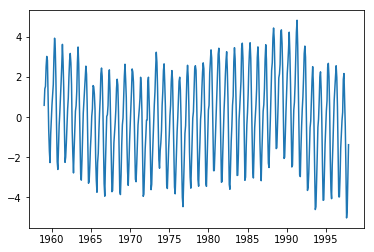

,Stationarity_adf
Test Statistics,-2.53
p-value,0.11
Used Lag,13.00
Used Observations,454.00
Critical Value(1%),-3.44
Maximum Information Criteria,260.10


,Stationarity_kpss
Test Statistics,0.17
p-value,0.10
Used Lag,18.00
Critical Value(10%),0.35


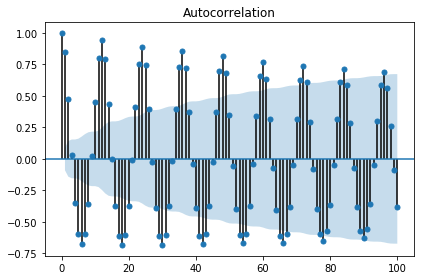

In [22]:
# 추세 제거 및 정상성 확인
## 방법1
plt.plot(raw.time, result.resid)
plt.show()

display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))

sm.graphics.tsa.plot_acf(result.resid, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

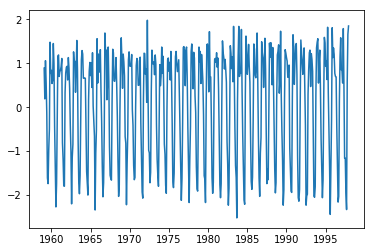

,Stationarity_adf
Test Statistics,-5.14
p-value,0.00
Used Lag,12.00
Used Observations,454.00
Critical Value(1%),-3.44
Maximum Information Criteria,271.87


,Stationarity_kpss
Test Statistics,0.04
p-value,0.10
Used Lag,18.00
Critical Value(10%),0.35


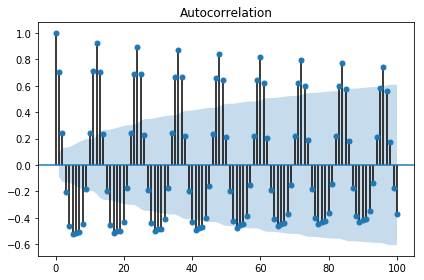

In [23]:
# 추세 제거 및 정상성 확인
## 방법2
plt.plot(raw.time[1:], raw.value.diff(1).dropna())
plt.show()

display(stationarity_adf_test(raw.value.diff(1).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(1).dropna(), []))

sm.graphics.tsa.plot_acf(raw.value.diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 실습: 호흡기질환 사망자수 계절성 제거

In [24]:
# 라이브러리 및 데이터 로딩
import pandas as pd
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

raw_set = datasets.get_rdataset("deaths", package="MASS")
raw = raw_set.data

In [25]:
# 시간변수 추출
raw.time = pd.date_range('1974-01-01', periods=len(raw), freq='M')
raw['month'] = raw.time.dt.month

,time,value,month
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11
71,1979-12-31,1915,12


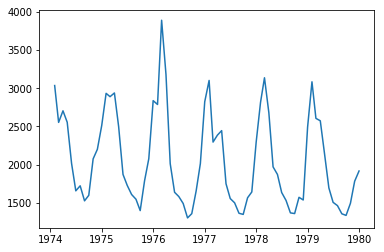

,Stationarity_adf
Test Statistics,-0.57
p-value,0.88
Used Lag,12.00
Used Observations,59.00
Critical Value(1%),-3.55
Maximum Information Criteria,841.38


,Stationarity_kpss
Test Statistics,0.65
p-value,0.02
Used Lag,12.00
Critical Value(10%),0.35


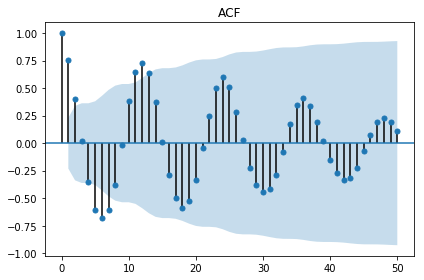

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           6.55e-21
Time:                        23:32:18   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

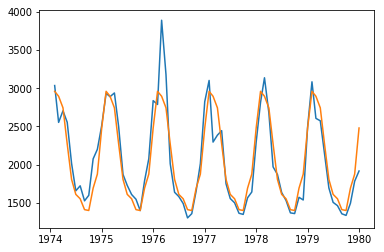

In [26]:
# 데이터 확인 및 추세 추정
display(raw.tail())
plt.plot(raw.time, raw.value)
plt.show()

display(stationarity_adf_test(raw.value, []))
display(stationarity_kpss_test(raw.value, []))
sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True, title='ACF')
plt.tight_layout()
plt.show()

result = sm.OLS.from_formula(formula='value ~ C(month) - 1', data=raw).fit()
display(result.summary())

plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show()

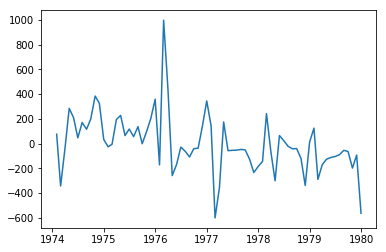

,Stationarity_adf
Test Statistics,-5.84
p-value,0.00
Used Lag,0.00
Used Observations,71.00
Critical Value(1%),-3.53
Maximum Information Criteria,812.36


,Stationarity_kpss
Test Statistics,0.54
p-value,0.03
Used Lag,12.00
Critical Value(10%),0.35


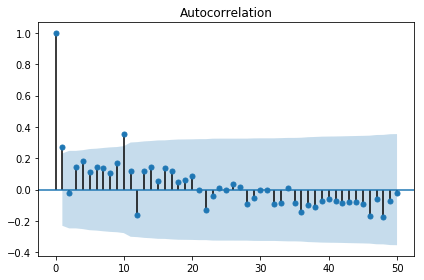

In [27]:
# 추세 제거 및 정상성 확인
## 방법1
plt.plot(raw.time, result.resid)
plt.show()

display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))
sm.graphics.tsa.plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

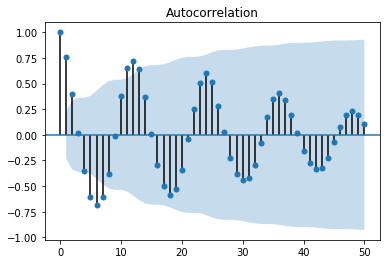

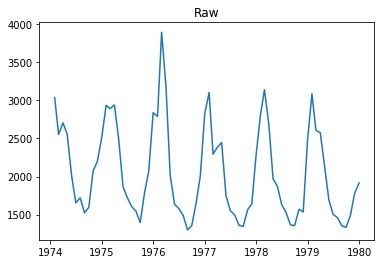

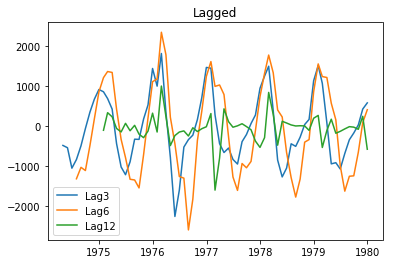

,Stationarity_adf
Test Statistics,-4.30
p-value,0.00
Used Lag,11.00
Used Observations,54.00
Critical Value(1%),-3.56
Maximum Information Criteria,786.67


,Stationarity_kpss
Test Statistics,0.35
p-value,0.10
Used Lag,11.00
Critical Value(10%),0.35


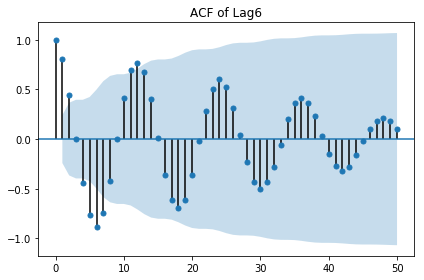

,Stationarity_adf
Test Statistics,-2.14
p-value,0.23
Used Lag,11.00
Used Observations,48.00
Critical Value(1%),-3.57
Maximum Information Criteria,703.72


,Stationarity_kpss
Test Statistics,0.09
p-value,0.10
Used Lag,11.00
Critical Value(10%),0.35


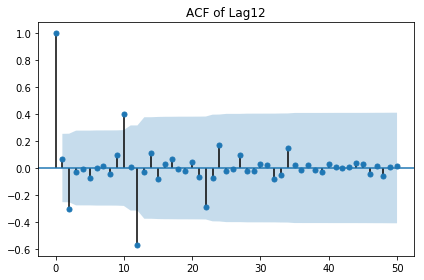

In [28]:
# 계절성 제거 및 정상성 확인
## 방법2
sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True)
plt.show()

plt.plot(raw.time, raw.value)
plt.title('Raw')
plt.show()
seasonal_lag = 3
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

seasonal_lag = 6
display(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

seasonal_lag = 12
display(stationarity_adf_test(raw.value.diff(seasonal_lag).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(seasonal_lag).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(seasonal_lag).dropna(), lags=50, 
                         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

### 실습: 랜덤워크의 정상성 변환

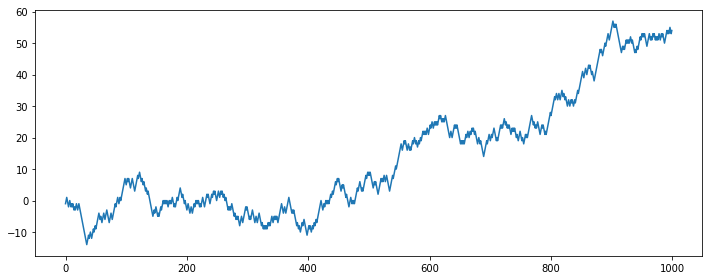

,Stationarity_adf
Test Statistics,0.34
p-value,0.98
Used Lag,0.00
Used Observations,999.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,773.39"


,Stationarity_kpss
Test Statistics,3.75
p-value,0.01
Used Lag,22.00
Critical Value(10%),0.35


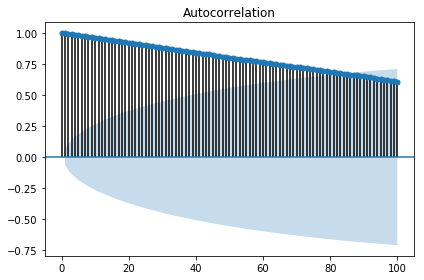

,Stationarity_adf
Test Statistics,-31.08
p-value,0.00
Used Lag,0.00
Used Observations,998.00
Critical Value(1%),-3.44
Maximum Information Criteria,"2,770.18"


,Stationarity_kpss
Test Statistics,0.22
p-value,0.10
Used Lag,22.00
Critical Value(10%),0.35


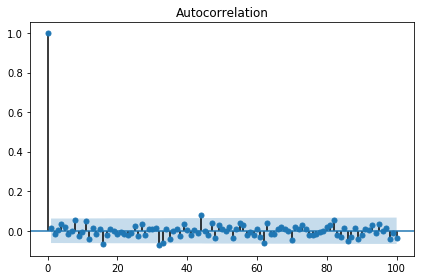

In [29]:
# 라이브러리 호출
import pandas as pd
import statsmodels.api as sm
from random import seed, random
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

# 랜덤워크 데이터 생성
plt.figure(figsize=(10, 4))
seed(1)
random_walk = [-1 if random() < 0.5 else 1]
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.tight_layout()
plt.show()

# 차분 전 랜덤워크 정상성 테스트
display(stationarity_adf_test(random_walk, []))
display(stationarity_kpss_test(random_walk, []))
sm.graphics.tsa.plot_acf(random_walk, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

# 차분 후 랜덤워크 정상성 테스트
display(stationarity_adf_test(pd.Series(random_walk).diff(1).dropna(), []))
display(stationarity_kpss_test(pd.Series(random_walk).diff(1).dropna(), []))
sm.graphics.tsa.plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 실습: 항공사 승객수요 스케일 변환(Log / Box-Cox)

Optimal Lambda:  0.14802256545004658


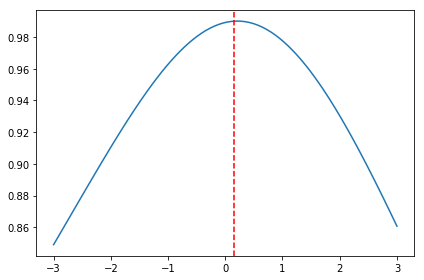

In [30]:
# 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy as sp
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

# Box-Cox 변환 모수 추정
x, y = sp.stats.boxcox_normplot(raw.value, la=-3, lb=3)
y_transfer, l_opt = sp.stats.boxcox(raw.value)
print('Optimal Lambda: ', l_opt)

plt.plot(x, y)
plt.axvline(x=l_opt, color='r', ls="--")
plt.tight_layout()
plt.show()

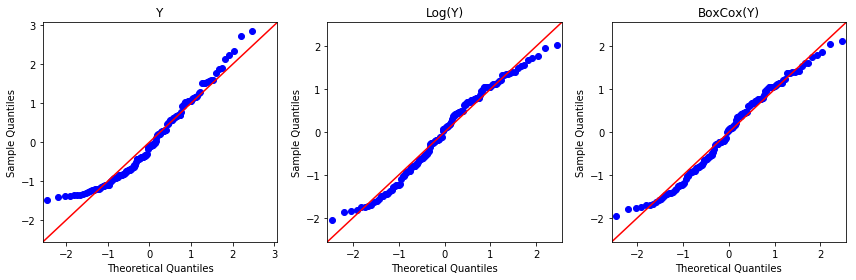

In [31]:
plt.figure(figsize=(12,4))
sm.qqplot(raw.value, fit=True, line='45', ax=plt.subplot(131))
plt.title('Y')
sm.qqplot(np.log(raw.value), fit=True, line='45', ax=plt.subplot(132))
plt.title('Log(Y)')
sm.qqplot(y_transfer, fit=True, line='45', ax=plt.subplot(133))
plt.title('BoxCox(Y)')
plt.tight_layout()
plt.show()

### 실습: 항공사 승객수요 정상성 변환

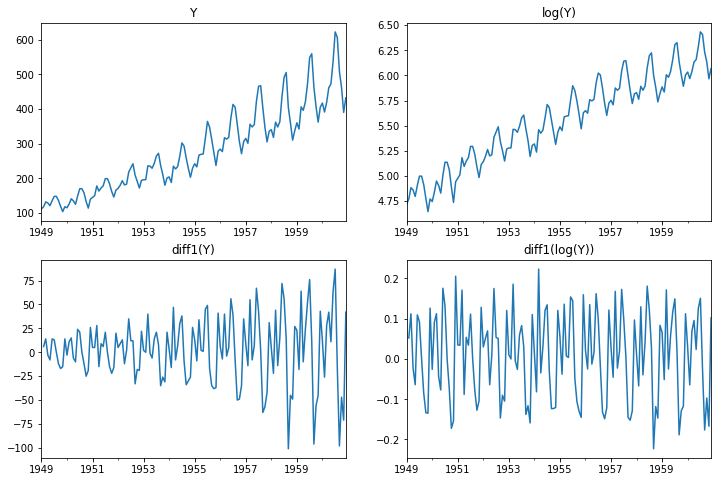

In [3]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

## 정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

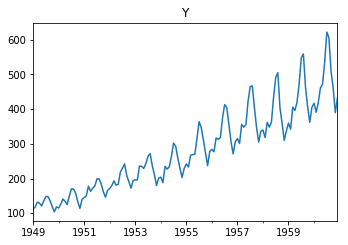

,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


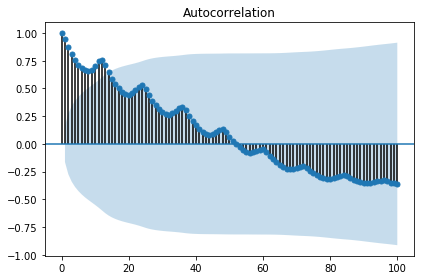

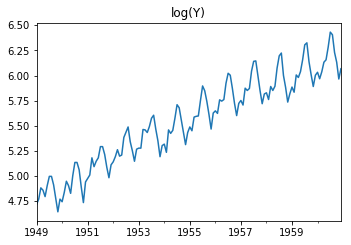

,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


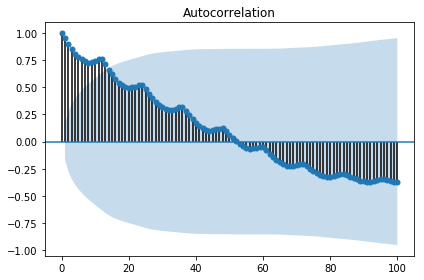

Trend Difference:  1


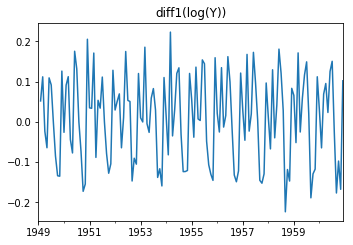

,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36


,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00
Critical Value(10%),0.35


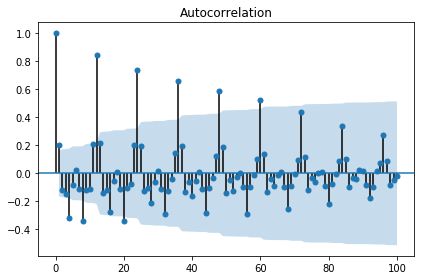

Seasonal Difference:  12


,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56


,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00
Critical Value(10%),0.35


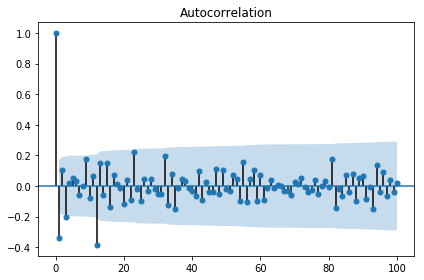

In [7]:
## 정상성 테스트
### 미변환
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(222), title='Y', legend=False)
plt.show()

candidate_none = raw.copy()
display(stationarity_adf_test(candidate_none.values.flatten(), []))
display(stationarity_kpss_test(candidate_none.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 변환
plt.figure(figsize=(12,8))
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
plt.show()

candidate_trend = np.log(raw).copy()
display(stationarity_adf_test(candidate_trend.values.flatten(), []))
display(stationarity_kpss_test(candidate_trend.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

trend_diff_order_initial = 0
result = stationarity_adf_test(candidate_trend.values.flatten(), []).T
if result['p-value'].values.flatten() < 0.1:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

### 로그+추세차분 변환
plt.figure(figsize=(12,8))
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_seasonal.values.flatten(), []))
display(stationarity_kpss_test(candidate_seasonal.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_seasonal, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

seasonal_diff_order = sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1
print('Seasonal Difference: ', seasonal_diff_order)

### 로그+추세차분+계절차분 변환
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_final.values.flatten(), []))
display(stationarity_kpss_test(candidate_final.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

## 일반 선형확률과정(General Linear Process)

> **"시계열 데이터가 가우시안 백색잡음의 현재값과 과거값의 선형조합"**  

\begin{align*}
Y_t = \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\psi_i^2 < \infty
\end{align*}

- **세부 알고리즘:**
    - WN(White Noise)
    - MA(Moving Average)
    - AR(Auto-Regressive)
    - ARMA(Auto-Regressive Moving Average)
    - ARIMA(Auto-Regressive Integrated Moving Average)
    - SARIMA(Seasonal ARIMA)

### WN(White Noise)

<center><img src='Image/White_Noise.png' width='300'></center>
    
>**1) 잔차들은 정규분포이고, (unbiased) 평균 0과 일정한 분산을 가져야 함:**  
\begin{align*}
\{\epsilon_t : t = \dots, -2, -1, 0, 1, 2, \dots\} \sim N(0,\sigma^2_{\epsilon_t}) \\
\end{align*}
\begin{align*}
where~~ \epsilon_t \sim  i.i.d(independent~and~identically~distributed) \\
\end{align*}
\begin{align*}
\epsilon_t = Y_t - \hat{Y_t}, \;\; E(\epsilon_t) = 0, \;\; Var(\epsilon_t) = \sigma^2_{\epsilon_t} \\
\end{align*}
\begin{align*}
Cov(\epsilon_s, \epsilon_k) = 0~for~different~times!(s \ne k)
\end{align*}
    
>**2) 잔차들이 시간의 흐름에 따라 상관성이 없어야 함:**  
- 자기상관함수(Autocorrelation Fundtion([ACF](https://en.wikipedia.org/wiki/Autocorrelation)))를 통해 $Autocorrelation~=~0$인지 확인
    - 공분산(Covariance): 
    <center>$Cov(Y_s, Y_k)$ = $E[(Y_s-E(Y_s))$$(Y_k-E(Y_k))]$ = $\gamma_{s,k}$</center>
    - 자기상관함수(Autocorrelation Function): 
    <center>$Corr(Y_s, Y_k)$ = $\dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}}$ = $\dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$</center>
    - 편자기상관함수(Partial Autocorrelation Function): $s$와 $k$사이의 상관성을 제거한 자기상관함수
    <center>$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})]$ for $1<t<k$</center>

- **특성요약:**
    - 강정상 과정(Stictly Stationary Process)
    - 강정상 예시로 시계열분석 기본알고리즘 중 가장 중요함
    - 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0.  
    \begin{align*}
    \gamma_i = \begin{cases} \text{Var}(\epsilon_t) & \;\; \text{ for } i = 0 \\  
    0 & \;\; \text{ for }  i \neq 0 \end{cases}
    \end{align*}
    - 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0.
    \begin{align*}
    \rho_i = \begin{cases} 1 & \;\; \text{ for } i = 0 \\  
    0 & \;\; \text{ for }  i \neq 0 \end{cases}
    \end{align*}

**1) 가우시안 백색잡음**

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(stats.norm.rvs(size=300))
plt.tight_layout()
plt.show()

**2) 베르누이 백색잡음**

> 백색잡음의 기반 확률분포가 반드시 정규분포일 필요는 없음

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
samples = stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(samples)), samples)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

### MA(Moving Average)

> **"$MA(q)$: 알고리즘의 차수($q$)가 유한한 가우시안 백색잡음과정의 선형조합"**
- Exponential Smoothing 내  Moving Average Smoothing은 과거의 Trend-Cycle을 추정하기 위함이고, MA는 미래 값을 예측하기 위함

\begin{align*}
Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} 
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
\end{align*}
\begin{align*}
Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} \\
&= \epsilon_t + \theta_1L\epsilon_t + \theta_2L^2\epsilon_t + \cdots + \theta_qL^q\epsilon_t \\ 
&= (1 + \theta_1L + \theta_2L^2 + \cdots + \theta_qL^q)\epsilon_t \\
&= \theta(L)\epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_{t-1} = L\epsilon_t~and~\epsilon_{t-2} = L^2\epsilon_t$
\end{align*}

- **MA(1):**  
\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1})^2] \\
&& &= E(\epsilon_t^2) + 2\theta_1E(\epsilon_{t}\epsilon_{t-1}) + \theta_1^2E(\epsilon_{t-1}^2) \\
&& &= \sigma_{\epsilon_i}^2 + 2 \theta_1 \cdot 0 + \theta_1^2 \sigma_{\epsilon_i}^2 \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-1}) + \theta_1 E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_{t-1}^2) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-2}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \sigma_{\epsilon_{i}}^2 + \theta_1^2 \cdot 0 \\
&& &= \theta_1 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_t \epsilon_{t-3}) + \theta_1 E (\epsilon_{t-1} \epsilon_{t-2}) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-3}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \cdot 0 + \theta_1^2 \cdot 0 \\
&& &= 0 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1}{1+\theta_1^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 1 \\
\end{align*}

- **MA(2):**  
\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) + \theta_2E(\epsilon_{t-2}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2})^2] \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 + \theta_2^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2} + \theta_2\epsilon_{t-3}) \right] \\
&& &= (\theta_1 + \theta_1\theta_2) \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3} + \theta_2\epsilon_{t-4}) \right] \\
&& &= \theta_2 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-i}) = \gamma_i &= 0~~for~~i > 2 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 2 \\
\end{align*}

- **MA(q):**  
\begin{align*}
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) = \rho_i &= 
\begin{cases} 
\dfrac{\theta_i + \theta_1\theta_{i-1}  + \theta_2\theta_{i-2} + \cdots + \theta_q\theta_{i-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } i= 1, 2, \cdots, q \\ 
0 & \text{ for } i > q \\ 
\end{cases}
\end{align*}

> **움직임 특성:**
- **Stationarity Condition of MA(1):** $|\theta_1| < 1$ 
- **Stationarity Condition of MA(2):** $|\theta_2| < 1$, $\theta_1 + \theta_2 > -1$, $\theta_1 - \theta_2 < 1$ 

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
### MA(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.9])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

In [ ]:
### MA(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 0.6])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

In [ ]:
### MA(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 1.6, 0.9, -1.5, 0.7])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

### AR(Auto-Regressive)

> **"$AR(p)$: 알고리즘의 차수($p$)가 유한한 자기자신의 과거값들의 선형조합"**
- **필요성:** ACF가 시차(Lag)가 증가해도 0이 되지 않고 오랜시간 남아있는 경우에 $MA$모형을 사용하면 차수가 $\infty$로 감

\begin{align*}
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty
\end{align*}
\begin{align*}
Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
Y_t - \phi_1Y_{t-1} - \phi_2Y_{t-2} - \cdots - \phi_pY_{t-p} &= \epsilon_t \\
Y_t - \phi_1LY_t - \phi_2L^2Y_t - \cdots - \phi_pL^pY_t &= \epsilon_t \\
(1 - \phi_1L - \phi_2L^2 - \cdots - \phi_pL^p)Y_t &= \epsilon_t \\
\phi(L)Y_t &= \epsilon_t \\
\end{align*}
\begin{align*}
where~Y_{t-1} = LY_t~and~Y_{t-2} = L^2Y_t
\end{align*}

- **AR(1):**  
\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^2  (\phi_1 Y_{t-3} + \epsilon_{t-2}) + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^3 Y_{t-3} + \phi_1^2 \epsilon_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} +\phi_1^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\text{Expectation}   && E(Y_t) &= \mu = E(\phi_1 Y_{t-1} + \epsilon_t) = \phi_1 E(Y_{t-1}) + E(\epsilon_{t}) = \phi_1 \mu + 0 \\
&& (1-\phi_1)\mu &= 0 \\
&& \mu &= 0~~if~~\phi_1 \neq 1 \\
\text{Variance}   && Var(Y_t) &= \gamma_0 = E(Y_t^2) = E[(\phi_1 Y_{t-1} + \epsilon_t)^2] = E[ \phi_1^2  Y_{t-1}^2 + 2\phi_1 Y_{t-1} \epsilon_{t} + \epsilon_{t}^2] \\
&& &= \phi_1^2 E[ Y_{t-1}^2 ] + 2 \phi E[ Y_{t-1} \epsilon_{t} ] + E[ \epsilon_{t}^2 ] \\
&& &= \phi_1^2 \gamma_0 + 0 + \sigma_{\epsilon_i}^2 \\
&& (1-\phi_1^2)\gamma_0 &= \sigma_{\epsilon_i}^2 \\
&& \gamma_0 &= \dfrac{\sigma_{\epsilon_i}^2}{1-\phi_1^2}~~if~~\phi_1^2 \neq 1 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) &= \gamma_1 = E [(\phi_1 Y_{t-1} + \epsilon_t)(\phi_1 Y_{t-2} + \epsilon_{t-1})] \\
&& &= \phi_1^2E (Y_{t-1} Y_{t-2}) + \phi_1 E (Y_{t-1} \epsilon_{t-1}) + \phi_1 E (\epsilon_{t} Y_{t-2}) + E (\epsilon_{t} \epsilon_{t-1}) \\
&& &= \phi_1^2\gamma_1 + \phi_1 \sigma_{\epsilon_{i}}^2 + \phi_1 \cdot 0 + 0 \\
&& (1 - \phi_1^2)\gamma_1 &= \phi_1 \sigma_{\epsilon_{i}}^2 \\
&& \gamma_1 &= \dfrac{\phi_1 \sigma_{\epsilon_{i}}^2}{1 - \phi_1^2} \\
&& Cov(Y_t, Y_{t-2}) &= \gamma_2 = E [(\phi_1 Y_{t-1} + \epsilon_t)(\phi_1 Y_{t-3} + \epsilon_{t-2})] \\
&& &= \phi_1^2E (Y_{t-1} Y_{t-3}) + \phi_1 E (Y_{t-1} \epsilon_{t-2}) + \phi_1 E (\epsilon_{t} Y_{t-3}) + E (\epsilon_{t} \epsilon_{t-2}) \\
&& &= \phi_1^2\gamma_2 + \phi_1 E[(\phi_1Y_{t-2}+\epsilon_{t-1})\epsilon_{t-2}] + \phi_1 \cdot 0 + 0 \\
&& &= \phi_1^2\gamma_2 + \phi_1^2 E(Y_{t-2}\epsilon_{t-2}) + \phi_1 E(\epsilon_{t-1}\epsilon_{t-2}) \\
&& &= \phi_1^2\gamma_2 + \phi_1^2 \sigma_{\epsilon_{i}}^2 + 0 \\
&& (1 - \phi_1^2)\gamma_2 &= \phi_1^2 \sigma_{\epsilon_{i}}^2 \\
&& \gamma_2 &= \dfrac{\phi_1^2 \sigma_{\epsilon_{i}}^2}{1 - \phi_1^2} \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \phi_1 \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \phi_1^2 \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= \phi_1^i \\
\end{align*}

> **움직임 특성:**
- $\phi_1 = 0$: $Y_t$는 백색잡음  
- $\phi_1 < 0$: 부호를 바꿔가면서(진동하면서) 지수적으로 감소  
- $\phi_1 > 0$: 시차가 증가하면서 자기상관계수는 지수적으로 감소  
- $\phi_1 = 1$: $Y_t$는 비정상성인 랜덤워크(Random Walk)
\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t \\
Var(Y_t) &= Var(Y_{t-1} + \epsilon_t) \\
&= Var(Y_{t-1}) + Var(\epsilon_t)  \;\; (\text{independence}) \\
Var(Y_t) &> Var(Y_{t-1})
\end{align*}
- **Stationarity Condition:** $|\phi_1| < 1$

- **AR(2):**  
\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \phi_2 (\phi_2 Y_{t-3} + \epsilon_{t-2}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \phi_2^2 Y_{t-3} + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& &= \phi_1^2 (\phi_1 Y_{t-3} + \phi_2 Y_{t-4} + \epsilon_{t-3}) + \phi_1 \epsilon_{t-1} + 
\phi_2^2 (\phi_1 Y_{t-4} + \phi_2 Y_{t-5} + \epsilon_{t-4}) + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-1} + \phi_1^2 \epsilon_{t-2} + \phi_2^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \phi_2^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\text{Expectation}   && E(Y_t) &= \mu = E(\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t) = \phi_1 E(Y_{t-1}) + \phi_2 E(Y_{t-2}) + E(\epsilon_{t}) = \phi_1 \mu + \phi_2 \mu + 0 \\
&& (1-\phi_1-\phi_2)\mu &= 0 \\
&& \mu &= 0~~if~~\phi_1+\phi_2 \neq 1 \\
\text{Covariance("Yule-Walker Equation")} && \gamma_i &= E(Y_tY_{t-i}) = E[(\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t)Y_{t-i}] \\
&& &= E(\phi_1 Y_{t-1}Y_{t-i}) + E(\phi_2 Y_{t-2}Y_{t-i}) + E(\epsilon_t Y_{t-i}) \\
&& &= \phi_1 \gamma_{i-1} + \phi_2 \gamma_{i-2} \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) &= \rho_i = \phi_1 \rho_{i-1} + \phi_2 \rho_{i-2} \\
&& \rho_1 &= \phi_1 \rho_{0} + \phi_2 \rho_{-1} = \phi_1 \cdot 1 + \phi_2 \rho_{1} \\
&& (1-\phi_2)\rho_1 &= \phi_1 \\
&& \rho_1 &= \dfrac{\phi_1}{1-\phi_2} \\
&& & \vdots \\
&& \rho_2 &= \dfrac{\phi_1^2 + \phi_2(1-\phi_2)}{1-\phi_2} \\
&& & \vdots \\
&& \rho_i &= \left( 1+\dfrac{1+\phi_2}{1-\phi_2} \cdot i \right)\left(\dfrac{\phi_1}{2} \right)^i \\
\end{align*}

> **움직임 특성:**
- 시차가 증가하면서 자기상관계수의 절대값은 지수적으로 감소  
- 진동 주파수에 따라 다르지만 진동 가능
- **Stationarity Condition:** $|\phi_1| < 1$, $\phi_1 + \phi_2 < 1$, $\phi_2 - \phi_1 < 1$ 

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

In [ ]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

In [ ]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

In [ ]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

In [ ]:
### AR(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25, -0.3, 0.1, -0.1])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

sm.graphics.tsa.plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

### Relation of MA and AR

- **가역성 조건(Invertibility Condition):**

> **1)** $MA(q)$ -> $AR(\infty)$: 변환 후 AR 모형이 Stationary Condition이면 "Invertibility"  
> **2)** $AR(p)$ -> $MA(\infty)$: 여러개 모형변환 가능하지만 "Invertibility" 조건을 만족하는 MA 모형은 단 1개만 존재 

### ARMA(Auto-Regressive Moving Average)

> **"$ARMA(p,q)$: 알고리즘의 차수($p~and~q$)가 유한한 $AR(p)$와 $MA(q)$의 선형조합"**  
> - $AR$과 $MA$의 정상성 조건과 가역성 조건이 동일하게 $ARMA$ 알고리즘들에 적용  
> - 종속변수 $Y_t$는 종속변수 $Y_t$와 백색잡음($\epsilon_t$) 차분들(Lagged Variables)의 합으로 예측가능  

\begin{align*}
Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
\end{align*}
\begin{align*}
where~\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)~and~\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty, \displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
\end{align*}
\begin{align*}
\phi(L)Y_t &= \theta(L)\epsilon_t \\
Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
\end{align*}

\begin{align*}
\text{Main Equation} && Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
&& &= \psi(L)\epsilon_t \text{ where } \psi(L) = \dfrac{\theta(L)}{\phi(L)} \\
&& &= (1 + \psi_1L + \psi_2L^2 + \cdots)\epsilon_t \\
&& &= \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
&& & \text{ where } \\
&& \psi_1 &= \theta_1 - \phi_1 \\
&& \psi_2 &= \theta_2 - \phi_2 - \phi_1 \psi_1 \\
&& & \vdots \\
&& \psi_j &= \theta_j - \phi_p\psi_{j-p} - \phi_2 \psi_{p-1} - \cdots - \phi_1 \psi_{j-1} \\
\text{Autocorrelation("Yule-Walker Equation")} && \rho_i &= \phi_1 \rho_{i-1} + \cdots + \phi_p \rho_{i-p} \\
\end{align*}

In [ ]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
### ARMA(1,0) = AR(1)
# Setting
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([])
index_name = ['const', 'ar(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(2,0) = AR(2)
# Setting
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([])
index_name = ['const', 'ar(1)', 'ar(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(4,0) = AR(4)
# Setting
np.random.seed(123)
ar_params = np.array([0.75, -0.25, 0.2, -0.5])
ma_params = np.array([])
index_name = ['const', 'ar(1)', 'ar(2)', 'ar(3)', 'ar(4)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(0,1) = MA(1)
# Setting
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65])
index_name = ['const', 'ma(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(0,2) = MA(2)
# Setting
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65, -0.25])
index_name = ['const', 'ma(1)', 'ma(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(0,4) = MA(4)
# Setting
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65, -0.25, 0.5, -0.9])
index_name = ['const', 'ma(1)', 'ma(2)', 'ma(3)', 'ma(4)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(1,1)
# Setting
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([0.65])
index_name = ['const', 'ar(1)', 'ma(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(2,2)
# Setting
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([0.65, 0.5])
index_name = ['const', 'ar(1)', 'ar(2)', 'ma(1)', 'ma(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [ ]:
### ARMA(5,5)
# Setting
np.random.seed(123)
ar_params = np.array([0.75, -0.25, 0.5, -0.5, -0.1])
ma_params = np.array([0.65, 0.5, 0.2, -0.5, -0.1])
index_name = ['const', 'ar(1)', 'ar(2)', 'ar(3)', 'ar(4)', 'ar(5)', 'ma(1)', 'ma(2)', 'ma(3)', 'ma(4)', 'ma(5)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

# Generator
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order,ma_order)).fit(trend='c', disp=0)
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]
ax = pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast', ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed', 'forecast'])
display(fit.summary2())
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

### 모형 차수결정 정리

> **1) 추정 및 예측을 하기 전에 파라미터에 따라 모형이 어떠한 결과를 도출할지 이해(예상) 필요**  
> **2) 결과이해(예상)는 기계의 실수를 방지하고 결과의 확신을 증가시킴**  

- **$p$, $q$ 파라미터 추론(by ACF and PACF):**  
1) 정상성 형태 변환: 차분/로그변환/계절성제거 등을 통해 데이터를 정상성 형태로 변환  
2) $ACF$, $PACF$를 도식화 하여 ARMA의 파라미터 차수를 추론  

| - | 자기회귀: $AR(p)$ | 이동평균: $MA(q)$ | 자기회귀이동평균: $ARMA(p,q)$ |
|----------------------|-------------------------------------------|-------------------------------------------|--------------------------------------------------------------|
| $ACF$ | 지수적 감소, 진동하는 사인 형태 | $q+1$ 차항부터 절단모양(0수렴) | $q+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |
| $PACF$ | $p+1$ 차항부터 절단모양(0수렴) | 지수적 감소, 진동하는 사인 형태 | $p+1$ 차항부터 지수적 감소 혹은 진동하는 사인형태 |

### 실습: 항체형성 호르몬수지 ARMA 모델링

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("lh")
raw = data.data
raw.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(raw.value, lags=10, ax=plt.subplot(211))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(raw.value, lags=10, ax=plt.subplot(212))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# MA(1) 모델링
fit = sm.tsa.ARMA(raw.value, (0,1)).fit()
display(fit.summary())

# AR(1) 모델링
fit = sm.tsa.ARMA(raw.value, (1,0)).fit()
display(fit.summary())

# ARMA(1,1) 모델링
fit = sm.tsa.ARMA(raw.value, (1,1)).fit()
display(fit.summary())

### 실습: 호흡기질환 사망자수 ARMA 모델링

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(raw.value.values, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(raw.value.values, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# ARMA(1,1) 모델링
fit = sm.tsa.ARMA(raw.value, (1,1)).fit()
display(fit.summary())

In [ ]:
from itertools import product

# ARMA(p,q) 모델링
result = []
for p, q in product(range(4), range(4)):
    if (p == 0 & q == 0):
        continue
    model = sm.tsa.ARMA(raw.value, (p, q))
    try:
        result.append({"p": p, "q": q, "LLF": model.fit().llf, "AIC": model.fit().aic, "BIC": model.fit().bic})
    except:
        pass
   
# 모형 최적모수 선택
result = pd.DataFrame(result)
display(result)
opt_ar = result.iloc[np.argmin(result['AIC']), 3]
opt_ma = result.iloc[np.argmin(result['AIC']), 4]

# ARMA 모델링
fit = sm.tsa.ARMA(raw.value, (opt_ar,opt_ma)).fit()
display(fit.summary())

# 잔차 ACF/PACF 확인
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

### ARMAX(ARMA with eXogenous)

\begin{align*}
\text{Equation of ARMA} && Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
\text{Equation of ARMAX} && Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t + \beta X \\
\end{align*}

### 실습: 통화량을 고려한 소비자지출 ARMAX 모델링

In [ ]:
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 로딩 및 확인
source_url = requests.get('http://www.stata-press.com/data/r12/friedman2.dta').content
raw = pd.read_stata(BytesIO(source_url))
raw.index = raw.time
raw_using = raw.ix['1960':'1981',["consump", "m2"]]
raw_using.plot()
plt.show()

# 회귀분석 모델링
fit = sm.OLS(raw_using.consump, sm.add_constant(raw_using.m2)).fit()
display(fit.summary())

# 잔차 확인
fit.resid.plot()
plt.show()

# 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

# ARIMAX 모델링
fit = sm.tsa.ARMA(raw_using.consump, (1,1), exog=raw_using.m2).fit()
display(fit.summary())

# 잔차 확인
fit.resid.plot()
plt.show()

# 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

In [ ]:
# SARIMAX 모델링
fit = sm.tsa.SARIMAX(raw_using.consump, exog=raw_using.m2, order=(1,0,0), seasonal_order=(1,0,1,4)).fit()
display(fit.summary())

# 잔차 확인
fit.resid.plot()
plt.show()

# 잔차 ACF/PACF
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(fit.resid, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual ACF")

sm.graphics.tsa.plot_pacf(fit.resid, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Residual PACF")
plt.tight_layout()
plt.show()

## 적분 선형확률과정(Integrated Linear Process)

### ARIMA(Auto-Regressive Integrated Moving Average)

> **"$ARIMA(p,d,q)$: 1이상의 차분이 적용된 $\Delta^d Y_t = (1-L)^d Y_{t}$가 알고리즘의 차수($p~and~q$)가 유한한 $AR(p)$와 $MA(q)$의 선형조합"**  
> - 비정상성인 시계열 데이터 $Y_t$를 차분한 결과로 만들어진 $\Delta Y_t = Y_t - Y_{t-1} = (1-L) Y_{t}$가 정상성인 데이터이고 ARIMA 모형을 따르면 원래의 $Y_t$를 **ARIMA 모형**이라고 함  
**=> $d \geq 1$:** $Y_t$는 비정상성 시계열 데이터이다(단위근을 갖는다)  
> - $d$번 차분한 후 시계열 $\Delta^d Y_t$가 정상성인 데이터이고 ARMA(p,q) 모형을 따른다면 적분차수(Order of Integrarion)가 $d$인 **ARIMA(p,d,q)**로 표기함  
    - $p=0$: ARIMA(0,d,q) = IMA(d,q)
    - $q=0$: ARIMA(p,d,0) = ARI(p,d)  

| Parameters | Description |
|-----|----------------------------------|
| $p$ | order of the autoregressive part |
| $d$ | degree of differencing involved |
| $q$ | order of the moving average part |


- **ARIMA(0,1,1) = IMA(1,1)**
> **"자기상관계수(ACF)가 빠르게 감소하지 않는 것이 ARIMA와 같은 적분과정(Integrated Process)의 특징"**
> - 시차(Lag)가 증가해도 ACF가 1이므로 감소하지 않음

\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t + \theta_1 \epsilon_{t-1} \\
Y_t &= \epsilon_t+(1+\theta)\epsilon_{t-1}+(1+\theta)\epsilon_{t-2}+(1+\theta)\epsilon_{t-3}+\cdots \\
Corr(Y_t, Y_{t-1}) &= \rho_i \approx 1
\end{align*}


- **ARIMA(0,2,1) = IMA(2,1)**

\begin{align*}
\Delta^2 Y_t = (1-L)^2 Y_{t} = \epsilon_t + \theta_1 \epsilon_{t-1}\\
\end{align*}

### ARIMA 모형 차수결정 정리

> **1) 추정 및 예측을 하기 전에 파라미터에 따라 모형이 어떠한 결과를 도출할지 이해(예상) 필요**  
> **2) 결과이해(예상)는 기계의 실수를 방지하고 결과의 확신을 증가시킴**  

- **$p$, $q$ 파라미터 추론(by ACF and PACF):**  
1) 정상성 형태 변환: 차분/로그변환/계절성제거 등을 통해 데이터를 정상성 형태로 변환  
2) $ACF$, $PACF$를 도식화 하여 ARMA의 파라미터 차수를 추론  

<center><img src='Image/ARIMA_Pattern.png' width='500'></center>

- **$c$, $d$ 파라미터 이해:**

> **"상수항(Const)인 $c$는 이론수식 복잡성으로 생략되기도 하나 존재가능"**  
> **"높은 차수의 차분($d$)은 예측 구간추정 범위를 급격하게 상승시킴"**   
> - $c = 0, d = 0$: 점추정은 0, 예측의 구간추정은 과거데이터의 표준편차
> - $c \neq 0, d = 0$: 점추정은 과거데이터의 평균, 예측의 구간추정은 과거데이터의 표준편차
> - $p \geq 2$: 특정 변동(계절성, 싸이클)을 반영한 예측을 위해선 2이상의 차수 필수
    - 예시: AR(2) 모형에서 $\phi_1^2+4\phi_2<0$를 만족해야 싸이클 형태로 예측되며 이때의 발생 싸이클은 다음과 같다
    \begin{align*}
    \frac{2\pi}{\text{arc cos}(-\phi_1(1-\phi_2)/(4\phi_2))}
    \end{align*}

| Parameters | Long-term Forecasts |
|-------------------|---------------------------------|
| $c = 0, \\ d = 0$ | go to zero |
| $c = 0, \\ d = 1$ | go to a non-zero constant |
| $c = 0, \\ d = 2$ | follow a straight line |
| $c \neq 0, \\ d = 0$ | go to the mean of the data |
| $c \neq 0, \\ d = 1$ | follow a straight line |
| $c \neq 0, \\ d = 2$ | follow a quadratic trend |

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 2차누적/1차누적/미누적 데이터생성 및 적분차수 이해
np.random.seed(123)
y2 = sm.tsa.ArmaProcess([1], [1, 0.6]).generate_sample(100).cumsum().cumsum()
y1 = np.diff(y2)
y0 = np.diff(y1)

plt.figure(figsize=(10,8))
plt.subplot(311)
plt.title("ARIMA Simulation")
plt.plot(y2, 'o-')
plt.subplot(312)
plt.plot(y1, 'o-')
plt.subplot(313)
plt.plot(y0, 'o-')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# 2차누적/1차누적/미누적 데이터시각화
plt.figure(figsize=(10,8))
sm.tsa.graphics.plot_acf(y2, ax=plt.subplot(311))
plt.grid()
sm.tsa.graphics.plot_acf(y1, ax=plt.subplot(312))
plt.grid()
sm.tsa.graphics.plot_acf(y0, ax=plt.subplot(313))
plt.grid()
plt.tight_layout()
plt.show()

- **과차분(Over-differencing):**
> **"필요 적분차수 이상의 차분은 MA모형을 생성!"**
> - ARIMA(0,d,0) 모형을 따르는 $Y_t$를 $d$번 차분하면 백색잡음만 남음
> - 추가 1차분: MA(1), 추가 2차분: MA(2)
> - 과적합은 ACF/PACF의 수치를 오히려 증가시킬 수 있음

\begin{align*}
\Delta^d Y_t &= \epsilon_t \\
\Delta^{d+1} Y_t &= \epsilon_t - \epsilon_{t-1} \\
\Delta^{d+2} Y_t &= \epsilon_t - 2\epsilon_{t-1} + \epsilon_{t-2} \\
\end{align*}

In [ ]:
# 과적차분 데이터 이해
y1_minus = np.diff(y0)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y1_minus, 'o-')
plt.title("Over-differencing 1 (Data)")
plt.grid()
sm.tsa.graphics.plot_acf(y1_minus, ax=plt.subplot(212))
plt.title("Over-differencing 1 (ACF)")
plt.grid()
plt.show()

y2_minus = np.diff(y1_minus)

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.plot(y2_minus, 'o-')
plt.title("Over-differencing 2 (Data)")
plt.grid()
sm.tsa.graphics.plot_acf(y2_minus, ax=plt.subplot(212))
plt.title("Over-differencing 2 (ACF)")
plt.grid()
plt.show()

- **단위근 존재 의미:**
> **"단위근을 갖는다는게 왜 비정상성 시계열 데이터라는 거지? -> $d$ 차분을 해야 정상성이 되니까!"**
> - "$Y_t$가 ARIMA(p,1,q)를 따른다" $=$ "$\Delta Y_t = Y_t - Y_{t-1}$가 정상성이며 ARMA(p,q)를 따른다"
> - 단위근이 있다는 것은 추세가 존재한다는 의미 -> 차분으로 추세제거 가능

\begin{align*}
\text{Main Equation of ARIMA} && \Delta Y_t = \phi_1 \Delta Y_{t-1} + \phi_2 \Delta Y_{t-2} + \cdots + \phi_p \Delta Y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t
\end{align*}

\begin{align*}
\Delta Y_t - \phi_1 \Delta Y_{t-1} - \phi_2 \Delta Y_{t-2} - \cdots - \phi_p \Delta Y_{t-p} &= \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} + \epsilon_t \\
Y_t-Y_{t-1} - \phi_1 (Y_{t-1}-Y_{t-2}) - \phi_2 (Y_{t-2}-Y_{t-3}) - \cdots - \phi_p (Y_{t-p}-Y_{t-p-1}) &= \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} \\
Y_t - (\phi_1+1)Y_{t-1} - (\phi_2-\phi_1)Y_{t-2} - \cdots - (\phi_p-\phi_{p-1})Y_{t-p} + \phi_pY_{t-p-1} &= \epsilon_t+\theta_1\epsilon_{t-1}+\theta_2 \epsilon_{t-2}+\cdots+\theta_q \epsilon_{t-q} \\
1-(\phi_1+1)Y-(\phi_2-\phi_1)Y^2-\cdots-(\phi_p-\phi_{p-1})Y^p+\phi_pY^{p+1} &= 0 \\
(1-Y)(1-\phi_1Y-\phi_2Y^2-\cdots-\phi_pY^p) &= 0 \\
\end{align*}

\begin{align*}
\text{Solution of ARIMA} && Y = 1 \text{ and } \sum_{i=1}^p \phi_i = 1
\end{align*}

\begin{align*}
1-\phi_1Y-\phi_2Y^2-\cdots-\phi_pY^p = 0 \\
\end{align*}

\begin{align*}
\text{Solution of ARMA} && \sum_{i=1}^p \phi_i = 1 \\
\end{align*}


- **ARIMA 표현식 정리:**

\begin{align*}
\text{Main Equation of ARMA} && Y_t &= \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
&& \phi(L)Y_t &= \theta(L)\epsilon_t \\
\text{Main Equation of ARIMA} && (1-L)^d Y_t &= \phi_1 (1-L)^d Y_{t-1} + \phi_2 (1-L)^d Y_{t-2} + \cdots + \phi_p (1-L)^d Y_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t \\
&& \phi(L)(1-L)^dY_t &= \theta(L)\epsilon_t \\
\end{align*}

\begin{equation}
  \begin{array}{c c c c}
    (1-\phi_1L - \cdots - \phi_p L^p) & (1-L)^d Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q)\epsilon_t\\
    {\uparrow} & {\uparrow} & {\uparrow}\\
    \text{AR($p$)} & \text{$d$ differences} & \text{MA($q$)}\\
  \end{array}
\end{equation}

| Time Series Algorithms | ARIMA Expressions |
|-------------------------|-------------------|
| White noise | ARIMA(0,0,0) |
| Random walk | ARIMA(0,1,0) |
| Autoregression($AR(p)$) | ARIMA($p$,0,0) |
| Moving average($MA(q)$) | ARIMA(0,0,$q$) |

\begin{align*}
\text{Main Equation of ARIMA} && (1-\phi_1L - \cdots - \phi_p L^p) (1-L)^d Y_{t} &= (1 + \theta_1 L + \cdots + \theta_q L^q)\epsilon_t\\
\text{Main Equation of ARIMAX} && (1-\phi_1L - \cdots - \phi_p L^p) (1-L)^d Y_{t} &= \sum^{k}_{i=1}\beta_{i}Z_{it} + (1 + \theta_1 L + \cdots + \theta_q L^q)\epsilon_t\\
\end{align*}


In [1]:
import pandas as pd
import numpy as np
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

,time,value,month
67,1978-08-31,9827,8
68,1978-09-30,9110,9
69,1978-10-31,9070,10
70,1978-11-30,8633,11
71,1978-12-31,9240,12


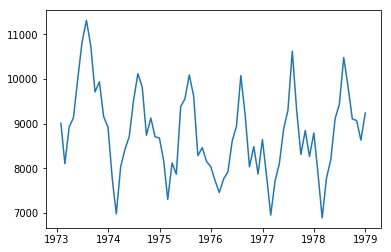

,Stationarity_adf
Test Statistics,-2.54
p-value,0.11
Used Lag,12.00
Used Observations,59.00
Critical Value(1%),-3.55
Maximum Information Criteria,870.44


,Stationarity_kpss
Test Statistics,0.28
p-value,0.10
Used Lag,12.00
Critical Value(10%),0.35


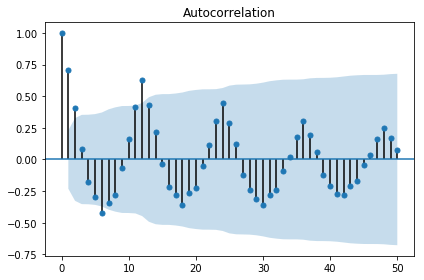

In [2]:
# ARIMA 모형의 한계
# 데이터 로딩 및 시간변수 반영
raw_set = datasets.get_rdataset("accdeaths", package="MASS")
raw = raw_set.data
raw.time = pd.date_range('1973-01-01', periods=len(raw), freq='M')
raw['month'] = raw.time.dt.month

# 데이터 확인
display(raw.tail())
plt.plot(raw.time, raw.value)
plt.show()

# 정상성 확인
display(stationarity_adf_test(raw.value, []))
display(stationarity_kpss_test(raw.value, []))
sm.graphics.tsa.plot_acf(raw.value, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

### SARIMA(Seasonal ARIMA)

> **"ARIMA 모형은 Non-seasonal 데이터 또는 Non-seasonal ARIMA 모델을 가정 -> 계절성 패턴 반영 모델 필요!"**  
- SARIMAX 클래스 이용하면 Multiplicated SARIMA(p,d,q)x(P,D,Q,m) 모형 추정 및 예측 가능  
- SARIMAX의 fit 메서드는 모수를 추정하여 그 결과를 SARIMAXResult 클래스 인스턴스로 반환 

\begin{align*}
\text{SARIMA} && \underbrace{(p, d, q)} && \underbrace{(P, D, Q)_m} \\
&& {\uparrow} && {\uparrow} \\
&& \text{Non-seasonal part} && \text{Seasonal part} \\
&& \text{of the model} && \text{of the model} \\
\end{align*}

\begin{align*}
\text{where } m = \text{ seasonal lag of observations.}
\end{align*}

\begin{align*}
\text{Equation of ARIMA(p,d,q)} && (1-\phi_1L - \cdots - \phi_p L^p) (1-L)^d Y_{t} &= 
  (1 + \theta_1 L + \cdots + \theta_q L^q) \epsilon_t\\
\text{Equation of ARIMA(1,1,1)} && (1 - \phi_{1}L) (1 - L)Y_{t} &= (1 + \theta_{1}L) \epsilon_{t}. \\
\text{Equation of SARIMA(1,1,1)(1,1,1)}_4 && (1 - \phi_{1}L)~(1 - \Phi_{1}L^{4}) (1 - L) (1 - L^{4})Y_{t} &=
  (1 + \theta_{1}L)~ (1 + \Theta_{1}L^{4})\epsilon_{t}.
\end{align*}

#### Simple SARIMA: 계절성 시차에서만 ACF가 유의하지 않음  
- **SARIMA(0,0,0)(0,0,1,12):** 각 월의 시계열 자료의 값이 현재의 백색잡음과 작년 동월 백색잡음에 의해 생성
> - ACF 그래프에서 계절성시차(Lag12)에서의 계수가 유의수준을 벗어난 증가를 보임(다른 시차에서는 유의수준 내 존재)  
> - PACF 그래프에서 반복되는 계절성시차들의 지수적 감소를 보임   

\begin{align*}
\text{Main Equation} && Y_t &= (1 + \Theta_{1}L^{12})\epsilon_{t} \\ 
&& &= \epsilon_t + \Theta \epsilon_{t-12} \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) &= \text{Cov}( \epsilon_t + \Theta \epsilon_{t-12} ,  \epsilon_{t-1} + \Theta \epsilon_{t-13} ) = 0 \\
&& Cov(Y_t, Y_{t-12}) &= \text{Cov}( \epsilon_t + \Theta \epsilon_{t-12} ,  \epsilon_{t-12} + \Theta \epsilon_{t-24} ) = -\Theta \sigma_e^2 \\
\text{Autocorrelation} && \rho_{k \cdot 12} &= \dfrac{\Theta_k + \Theta_{1}\Theta_{k+1} + \Theta_{2}\Theta_{k+2} + \cdots + \Theta_{Q-k}\Theta_{k+Q}}{1 + \Theta_1^2 +\Theta_2^2 + \cdots + \Theta_Q^2} \\
\end{align*}

- **SARIMA(0,0,0)(1,0,0,12):** 각 월의 시계열 자료의 값이 작년 동월 자료값과 현재의 백색잡음에 의해 생성
> - ACF 그래프에서 반복되는 계절성시차들의 지수적 감소를 보임  
> - PACF 그래프에서 계절성시차(Lag12)에서의 계수가 유의수준을 벗어난 증가를 보임(다른 시차에서는 유의수준 내 존재)  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12}) Y_{t} &= \epsilon_t \\
&& Y_t &= \Phi Y_{t-12} + \epsilon_t \\
\text{Stationary Condition} && \Phi &< 1 \\
\text{Autocorrelation} && \rho_{k \cdot 12} &= (-1)^{k+1}\Phi^k \\
\end{align*}

- **SARIMA(0,0,0)(P,0,Q,12):**  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12} - \Phi_{2}L^{24} - \cdots - \Phi_{P}L^{12P}) Y_{t} &= (1 + \Theta_{1}L^{12} + \Theta_{2}L^{24} + \cdots + \Theta_{Q}L^{12Q})\epsilon_{t} \\ 
&& Y_t - \Phi_1 Y_{t-12} - \Phi_2 Y_{t-24} - \cdots - \Phi_P Y_{t-12P} &= \epsilon_t + \Theta_1 \epsilon_{t-12} + \Theta_2 \epsilon_{t-24} + \cdots + \Theta_Q \epsilon_{t-12Q} \\
\end{align*}

- **SARIMA(0,0,0)(P,1,Q,12):**  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12} - \Phi_{2}L^{24} - \cdots - \Phi_{P}L^{12P}) (1-L^{12}) Y_{t} &= (1 + \Theta_{1}L^{12} + \Theta_{2}L^{24} + \cdots + \Theta_{Q}L^{12Q})\epsilon_{t} \\
&& (Y_t-Y_{t-12}) - \Phi_1 (Y_{t-12}-Y_{t-24}) - \cdots - \Phi_P (Y_{t-12P}-Y_{t-12(P+1)}) \\
&&= \epsilon_t + \Theta_1 \epsilon_{t-12} + \Theta_2 \epsilon_{t-24} + \cdots + \Theta_Q \epsilon_{t-12Q} \\
\end{align*}

- **SARIMA(0,0,0)(0,1,1,12):**  

\begin{align*}
\text{Main Equation} && (1-L^{12}) Y_{t} &= (1 + \Theta_{1}L^{12})\epsilon_{t} \\
&& Y_t-Y_{t-12} &= \epsilon_t + \Theta_1 \epsilon_{t-12} \\
&& Y_t &= Y_{t-12} + \epsilon_t + \Theta_1 \epsilon_{t-12} \\
\end{align*}

- **SARIMA(0,0,0)(1,1,0,12):**  

\begin{align*}
\text{Main Equation} && (1 - \Phi_{1}L^{12}) (1-L^{12}) Y_{t} &= \epsilon_{t} \\
&& (Y_t-Y_{t-12}) - \Phi_1 (Y_{t-12}-Y_{t-24}) &= \epsilon_t \\
&& Y_t- (1 + \Phi_1)Y_{t-12} + \Phi_1 Y_{t-24} &= \epsilon_t \\
&& Y_t &= (1 + \Phi_1)Y_{t-12} - \Phi_1 Y_{t-24} + \epsilon_t \\
\end{align*}


- **계절성 차수 추정 정리:** 계절성 부분의 AR과 MA 차수는 ACF/PACF의 계절성 시차(Lag) 형태로 파악 가능  

| Parameters | Description |
|-------|-------------------------------------------------------|
| $p$ | Trend autoregression order |
| $d$ | Trend difference order |
| $q$ | Trend moving average order |
| $m$ | the number of time steps for a single seasonal period |
| $P$ | Seasonal autoregression order |
| $D$ | Seasonal difference order |
| $Q$ | Seasonal moving average order |

> **예시1:** ARIMA(0,0,0)(0,0,1$)_{12}$  
> - ACF 그래프에서 계절성시차(Lag12)에서의 계수가 유의수준을 벗어난 증가를 보임(다른 시차에서는 유의수준 내 존재)  
> - PACF 그래프에서 반복되는 계절성시차들의 지수적 감소를 보임  

> **예시2:** ARIMA(0,0,0)(1,0,0$)_{12}$  
> - ACF 그래프에서 반복되는 계절성시차들의 지수적 감소를 보임  
> - PACF 그래프에서 계절성시차(Lag12)에서의 계수가 유의수준을 벗어난 증가를 보임(다른 시차에서는 유의수준 내 존재)  


In [ ]:
import pandas as pd
import numpy as np
from statsmodels import datasets
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# SARIMA(0,0,0)(0,0,1,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA(0,0,0)(1,0,0,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA(0,0,0)(0,1,1,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
ma_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.95])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA(0,0,0)(1,1,0,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.95])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

#### Multiplicated SARIMA: 계절성 시차와 그 주변의 시차에서도 ACF가 유의하지 않음  
- **SARIMA(0,0,1)(0,0,1,12):** 계절주기 12고 계절주기 자료들 간에는 ARIMA(0,0,1), 비계절 자료들 간에는 ARIMA(0,0,1)  
> - 시차(Lag)가 1, 11, 12, 13인 경우를 제외하고는 자기상관계수가 모두 0  

\begin{align*}
\text{Main Equation} && Y_t &= (1+\theta L)(1+\Theta L^{12}) \epsilon_t = \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
\text{Autocorrelation} && \rho_1 &= -\dfrac{\theta}{1+\theta^2} \\
&& \rho_{11} = \rho_{13} &= \dfrac{\theta\Theta}{(1+\theta^2)(1+\Theta^2)} \\
&& \rho_{12} &= -\dfrac{\Theta}{1+\Theta^2} \\
\end{align*}

- **SARIMA(0,0,1)(1,0,0,12):** 계절주기 12고 계절주기 자료들 간에는 ARIMA(1,0,0), 비계절 자료들 간에는 ARIMA(0,0,1)  
> - 시차(Lag)가 12의 배수와 그 앞/뒤인 경우(12$k$, 12$k$+1, 12$k$-1)를 제외하고는 자기상관계수가 모두 0  

\begin{align*}
\text{Main Equation} && (1 - \Phi L^{12})Y_t &= (1 + \theta L) \epsilon_t \\
&& Y_t &=  \Phi Y_{t-12} + \epsilon_t + \theta \epsilon_{t-1} \\
\text{Autocorrelation} && \rho_{12k} &= (-1)^{k+1}\Phi^k \\
&& \rho_1 &= -\dfrac{\theta}{1+\theta^2} \\
&& \rho_{12k-1} = \rho_{12k+1} &= (-1)^{k+1}\dfrac{\theta}{1+\theta^2} \Phi^k \\
\end{align*}

- **SARIMA(0,1,0)(0,1,0,12):** 계절주기 12고 계절주기 간 1차 차분 ARIMA(0,0,0), 비계절 자료들 간 1차 차분 ARIMA(0,0,0)  
> - 시계열을 1차 차분하고 그 시계열을 다시 12간격 차분하면 백색잡음    

\begin{align*}
\text{Main Equation} && (1 - L^{12})(1 - L)Y_t &= \epsilon_t \\
&& (1 - L^{12})(Y_t - Y_{t-1}) &= \epsilon_t \\
&& Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13} &= \epsilon_t \\
&& Y_t &= Y_{t-1} + Y_{t-12} - Y_{t-13} + \epsilon_t \\
\end{align*}

- **SARIMA(0,1,1)(0,1,1,12):** 계절주기 12고 계절/비계절 자료 모두 1차 차분 ARIMA(0,1,1)  
> - 시계열을 1차 차분하고 그 시계열을 다시 12간격 차분하면 계절/비계절 자료 모두 ARIMA(0,0,1)    

\begin{align*}
\text{Main Equation} && (1 - L^{12})(1 - L)Y_t &= (1 + \theta L)(1 + \Theta L^{12}) \epsilon_t \\
&& (1 - L^{12})(Y_t - Y_{t-1}) &= \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
&& Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13} &= \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
&& Y_t &= Y_{t-1} + Y_{t-12} - Y_{t-13} + \epsilon_t + \theta \epsilon_{t-1} + \Theta \epsilon_{t-12} + \theta\Theta \epsilon_{t-13} \\
\end{align*}

- **SARIMA(1,1,0)(1,1,0,12):** 계절주기 12고 계절/비계절 자료 모두 1차 차분 ARIMA(1,1,0)  
> - 시계열을 1차 차분하고 그 시계열을 다시 12간격 차분하면 계절/비계절 자료 모두 ARIMA(1,0,0)    

\begin{align*}
\text{Main Equation} && (1 - \phi L)(1 - \Phi L^{12})(1 - L^{12})(1 - L)Y_t &= \epsilon_t \\
&& (1 - \phi L)(1 - \Phi L^{12})(1 - L^{12})(Y_t - Y_{t-1}) &= \epsilon_t \\
&& (1 - \phi L)(1 - \Phi L^{12})(Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13}) &= \epsilon_t \\
&& (1 - \phi L)(Y_t - Y_{t-1} - Y_{t-12} + Y_{t-13} - \Phi Y_{t-12} + \Phi Y_{t-13} + \Phi Y_{t-24} - \Phi Y_{t-25})  Y_t &= \epsilon_t \\
&& (1 - \phi L)(Y_t - Y_{t-1} - (1 + \Phi)Y_{t-12} + (1 + \Phi)Y_{t-13} + \Phi Y_{t-24} - \Phi Y_{t-25})  Y_t &= \epsilon_t \\
&& Y_t - Y_{t-1} - (1 + \Phi)Y_{t-12} + (1 + \Phi)Y_{t-13} + \Phi Y_{t-24} - \Phi Y_{t-25} &\\
&& - \phi Y_{t-1} +\phi Y_{t-2} +\phi (1 + \Phi)Y_{t-13} -\phi (1 + \Phi)Y_{t-14} -\phi \Phi Y_{t-25} +\phi \Phi Y_{t-26} &= \epsilon_t \\
&& Y_t - (1+\phi) Y_{t-1} +\phi Y_{t-2} - (1 + \Phi)Y_{t-12} +((1 + \Phi)+\phi (1 + \Phi))Y_{t-13} &\\
&& -\phi (1 + \Phi)Y_{t-14} + \Phi Y_{t-24} - (\Phi+\phi \Phi) Y_{t-25} +\phi \Phi Y_{t-26} &= \epsilon_t \\
\end{align*}


- **예시:**  

> (원 데이터)  
> <center><img src='Image/TS_SARIMA_Example1.png' width='600'></center>  

> - $p:2?$ (PACF 기준 lag 2까지 유의하고 그 뒤로는 유의하지 않음)  
> - $d:1?$ (ADF가 대중가설을 기각하므로 추세 1차 차분)  
> - $q:1?$ (ACF 기준 필요성 인지)  
> - $P:1?$ (PACF 기준 lag 24 간격 유의성으로 필요성 인지)    
> - $D:1?$ (계절성 차분 필요함 인지)  
> - $Q:2?$ (ACF 기준 lag 24 간격 유의성으로 필요성 인지)  
> - $m:24?$ (ACF/PACF 기준 lag 24 간격으로 유의한 진동 존재)  

> (계절차분 후 데이터)  
> <center><img src='Image/TS_SARIMA_Example2.png' width='600'></center>  

> - $p:1?$ (PACF 기준 lag 1까지 유의하고 그 뒤로는 유의하지 않음)  
> - $d:1?$ (ADF가 대중가설을 기각하고 그래프 상 추세가 보이므로 일단 추세 1차 차분)  
> - $q:3?$ (ACF 기준 필요성 인지)  
> - $P:2?$ (PACF 기준 lag 24 간격 유의성으로 필요성 인지)    
> - $D:1$ (계절성 차분 필요)  
> - $Q:0?$ (ACF 기준 lag 24 간격 유의성으로 필요성 인지)  
> - $m:24$ (ACF/PACF 기준 lag 24 간격으로 유의한 진동 크게 사라짐)  

> (계절성 및 추세차분 후 데이터)  
> <center><img src='Image/TS_SARIMA_Example3.png' width='600'></center>  

> - $p:max4$ (PACF 기준 lag 4까지 유의하고 그 뒤로는 유의하지 않음)  
> - $d:1$ (ADF가 대중가설을 기각하고 그래프 상 추세도 없어졌으므로 추세 1차 차분 확정)  
> - $q:max4$ (ACF 기준 lag 4까지 유의하고 그 뒤로는 유의하지 않음)  
> - $P:max2$ (PACF 기준 lag 24 간격으로 2번정도 유의함)    
> - $D:1$ (계절성 차분 필요함 인지)  
> - $Q:max1$ (ACF 기준 lag 24 간격으로 1번정도 유의함)  
> - $m:24$ (lag 24 간격으로 진동 존재)  

> (잔차검증)
> <center><img src='Image/TS_SARIMA_Example4.png' width='600'></center>  

In [ ]:
# SARIMA(0,0,1)(0,0,1,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
phi, Phi = 0, 0
theta, Theta = 0.5, 0.8
ar_params = np.array([])
ma_params = np.array([theta, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Theta, theta*Theta])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA(0,0,1)(1,0,0,12)
plt.figure(figsize=(10, 4))
np.random.seed(123)
phi, Phi = 0, 0.75
theta, Theta = 0.5, 0
ar_params = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, Phi])
ma_params = np.array([theta])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 9))
plt.subplot(411)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical ACF of an SARIMA process")

plt.subplot(412)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=50))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical PACF of an SARIMA process")

sm.graphics.tsa.plot_acf(y, lags=50, ax=plt.subplot(413))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling ACF of an SARIMA process")

sm.graphics.tsa.plot_pacf(y, lags=50, ax=plt.subplot(414))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("Sampling PACF of an SARIMA process")
plt.tight_layout()
plt.show()

### 실습: 호흡기질환 사망자수 SARIMA 모델링

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터로딩 및 확인
data = sm.datasets.get_rdataset("deaths", "MASS")
raw = data.data
raw.value = np.log(raw.value)
raw.plot(x='time', y='value')
plt.show()

# ACF/PACF 확인
plt.figure(figsize=(10, 8))
sm.graphics.tsa.plot_acf(raw.value.values, lags=50, ax=plt.subplot(211))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("ACF")

sm.graphics.tsa.plot_pacf(raw.value.values, lags=50, ax=plt.subplot(212))
plt.xlim(-1, 51)
plt.ylim(-1.1, 1.1)
plt.title("PACF")
plt.tight_layout()
plt.show()

# ARMA(1,1) 모델링
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,0,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA 모델링
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,0,1), seasonal_order=(1,1,1,12)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

### 실습: 항공사 승객수요 SARIMA 모델링

In [ ]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

## 정상성 확보
plt.figure(figsize=(12,8))
raw.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(raw).plot(ax=plt.subplot(222), title='log(Y)', legend=False)
raw.diff(1).plot(ax=plt.subplot(223), title='diff1(Y)', legend=False)
np.log(raw).diff(1).plot(ax=plt.subplot(224), title='diff1(log(Y))', legend=False)
plt.show()

In [ ]:
# ARIMA 모델링 (raw)
fit = sm.tsa.SARIMAX(raw.value, trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

# ARIMA 모델링 (log(raw))
fit = sm.tsa.SARIMAX(np.log(raw.value), trend='c', order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
# SARIMA 모델링 (log(raw))
fit = sm.tsa.SARIMAX(np.log(raw.value), trend='c', order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
display(fit.summary())

# 잔차진단
fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

## 선형확률과정의 분석싸이클

### 분석싸이클 정리(Non-seasonal)

**1. 분석싸이클 제시: [<박스-젠킨스 방법론>](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method)**

> **1) 모형의 모수추정(Model Identification):** 
    - 시계열 데이터의 정상성을 확인하고 계절변동이 있는지도 확인  
    - ACF/PACF 를 사용해서 자기회귀이동평균 모형 p,q 차수를 결정   
    
> **2) 모델링 및 검증(Parameter Estimation):**  
    - 회귀분석과 기계학습 등의 검증지표를 마찬가지로 사용  
    - 모형 추정은 최소제곱방법과 유사하지만 가우스-뉴튼 아이디어에 기초한 수치해석방법을 적용  

> **3) 잔차진단(Model Diagnostics):**  
    - 자기회귀이동평균 모형을 적용시키고 남은 잔차의 정상성을 확인하는데 중점  
    - 잔차가 서로 독립이고 시간에 따라 평균과 분산이 일정한지 검증 
    - 시계열 데이터의 자기상관을 검정하기 위해 다양한 검정통계량을 사용하는데,  
    Ljung-Box 통계량, 평균과 분산이 일정한지, ACF/PACF 사용하여 추가적으로 모형에 누락된 것이 없는지 검정 
    
    
**2. 분석싸이클 일반화**

> **0) 데이터 전처리 및 시각화를 통해 Outlier 확인/변경/제거**

> **1) 비정상 과정에서 정상 과정 추출**
- 결정론적 추세나 확률적 추세가 있는지 확인
    - 결정론적 추세는 회귀분석, 다항식 등으로 모형화 후 이를 분리
    - 확률적 추세인 경우, 즉 ARIMA 모형인 경우에는 ADF(Augmented Dickey Fuller) 검정을 사용하여 적분차수(Order of Integration)을 알아내서 차분  
  
> **2) 정규성 확인**
- 정규성 검정을 통해 자료의 분포가 정규 분포인지 확인
    - 일반 선형 확률 과정인 경우에는 전체 시계열이 가우시안 백색 잡음의 선형 조합으로 이루어지기 때문에 시계열 자체도 가우시안 정규 분포
    - ARIMA 모형 등의 일반 선형 확률 과정으로 모형화하려면 우선 정규성 검정(Normality Test)을 사용하여 분포가 정규 분포인지 확인
- 만약 시계열 자료의 분포가 로그 변환이나 Box-Cox 변환을 사용하여 정규성이 개선된다면 이러한 변환을 사용 가능
  
> **3) 정상 과정에 대한 ARMA 모형 차수 결정**
- ACF/PACF 분석으로 AR(p) 모형 또는 MA(q) 모형 결정
    - ACF가 특정 차수 이상에서 없어지는 경우(Cut-off)에는 MA 모형을 사용 가능
    - PACF가 특정 차수 이상에서 없어지면 AR 모형을 사용 가능
    - ACF와 PACF 모두 특정 차수 이상에서 없어지는 현상이 나타나지 않는다면 ARMA 모형을 사용
- ARMA 모형인 경우 모수 추정시 AIC/BIC 값을 이용하여 차수 결정 및 모수추정도 동시에 이루어 짐

> **4) ARMA 모형의 모수 추정**
- MM(Method of Modent)/LS(Least Square)/MLE(Maximum Likelihood Estimation) 등의 방법론으로 모수 추정
- ADF(Augmented Dickey Fuller) 검정을 사용하여 해당 수식에 대한 계수 즉 모수 값을 추정
- 부트스트래핑을 사용하여 모수의 표준 오차 추정

> **5) 잔차 진단(모형 진단)**  
: 모형이 추정된 다음 진단(Diagnosis) 과정을 통해 추정이 올바르게 이루어졌는지 검증  
: 기본적으로 잔차(Residual)가 백색 잡음이 되어야 하므로 잔차에 대해 다음을 조사  
- 잔차에 대한 정규성 검정
- 잔차에 대한 ACF 분석 또는 Ljung-Box Q 검정으로 모형 차수 재확인
: 잔차가 백색잡음이 아니면 새로운 모형으로 위 모든 단계(0~4단계)를 새로 시작
: 잔차가 백색잡음이면 일단은 예측력을 확인 -> 예측력이 낮을 시 새로운 모형으로 위 모든 단계(0~4단계)를 새로 시작

    
**3. 분석싸이클 비교:**

| 단계 | 기계학습 | 시계열분석 |
|----------|----------------|--------------------|
| 전처리 | 변수 확장 | 정상성 확보 |
| 시각화 | 모델/변수 선택 | 모델/파라미터 선택 |
| 모델링 | 상동 | 상동 |
| 검증 | 상동 | 상동 |
| 잔차진단 | 상동 | 상동 |

### 분석싸이클 자동화(Non-seasonal)

- **"Hyndman-Khandakar algorithm for automatic ARIMA modelling"**
> 차수가 높지않은 SARIMA 알고리즘을 자동화 한 것으로 [Hyndman-Khandakar 알고리즘(2008)](https://www.jstatsoft.org/article/view/v027i03)을 기반으로 함  
> 정상성변환(Unit Root Calculation), 검증지표 최적화(AIC) 및 MLE 방법을 사용한 모수추정을 모두 포함  

- **자동화 과정:** 일반화 분석싸이클의 2~4단계만 자동화

> **1. KPSS 검정통계량을 사용한 독립변수($Y_t$)의 적분차수/차분차수 결정($0 \leq d \leq 2$)**  

> **2. 차분된 독립변수 $(1 - L)^d Y_t$에 $AIC$를 줄여가며 초기모형 후보들 적합을 통한 Base모형의 차수 $p$와 $q$를 선택**  
> - 만약 $d \leq 1$, 초기모형 후보 5종
    - ARIMA(0,d,0) without constant
    - ARIMA(0,d,0) with constant
    - ARIMA(0,d,1) with constant
    - ARIMA(1,d,0) with constant
    - ARIMA(2,d,2) with constant  
> - 만약 $d = 2$, 초기모형 후보 4종
    - ARIMA(0,d,0) without constant
    - ARIMA(0,d,1) without constant
    - ARIMA(1,d,0) without constant
    - ARIMA(2,d,2) without constant    
      
> **3. Base모형의 파라미터 튜닝을 통한 Agile모형 선택**  
1) Base모형에서 $p$와 $q$를 $\pm 1$ 변화시키며 AIC들을 추정  
2) $p$와 $q$ 변경 및 상수항(Constant) 반영/미반영하며 AIC들을 추정  
3) 최적의 Agile모형 선택  

> **4. 최종 모형 선택**  
1) 추정된 Agile모형을 Base모형으로 변경  
2) AIC가 더이상 줄어들지 않을 때까지 3번의 과정을 반복하여 Agile모형 재추정  
3) 최종 Agile모형이 최종 선택된 시계열모형  

<center><img src='Image/TS_Analysis_Cycle.png' width='600'></center>

~~~
fit = auto_arima(Y_train, stationary=False,
                 trend='c', start_p=0, start_q=0, max_p=5, max_q=5, max_d=3,
                 seasonal=True, start_P=0, start_Q=0, max_P=5, max_Q=5, m=seasonal_diff_order,
                 stepwise=True, trace=True)
~~~

### 실습: 항공사 승객수요 Auro-ARIMA 모델링

,Stationarity_adf
Test Statistics,0.82
p-value,0.99
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,996.69


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


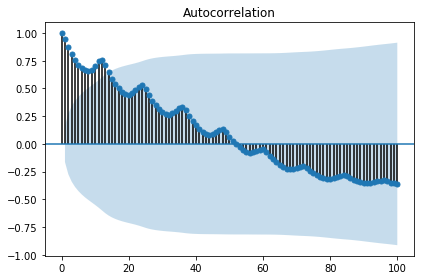

,Stationarity_adf
Test Statistics,-1.72
p-value,0.42
Used Lag,13.00
Used Observations,130.00
Critical Value(1%),-3.48
Maximum Information Criteria,-445.40


,Stationarity_kpss
Test Statistics,1.05
p-value,0.01
Used Lag,14.00
Critical Value(10%),0.35


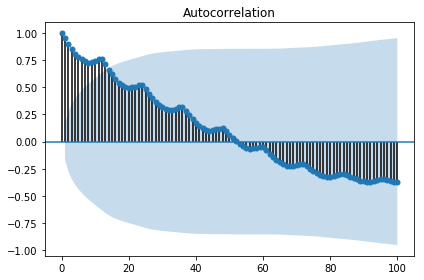

Trend Difference:  1


,Stationarity_adf
Test Statistics,-2.72
p-value,0.07
Used Lag,14.00
Used Observations,128.00
Critical Value(1%),-3.48
Maximum Information Criteria,-440.36


,Stationarity_kpss
Test Statistics,0.10
p-value,0.10
Used Lag,14.00
Critical Value(10%),0.35


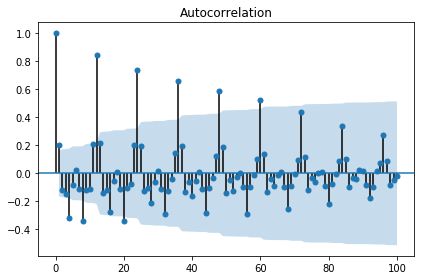

Seasonal Difference:  12


,Stationarity_adf
Test Statistics,-4.44
p-value,0.00
Used Lag,12.00
Used Observations,118.00
Critical Value(1%),-3.49
Maximum Information Criteria,-415.56


,Stationarity_kpss
Test Statistics,0.11
p-value,0.10
Used Lag,13.00
Critical Value(10%),0.35


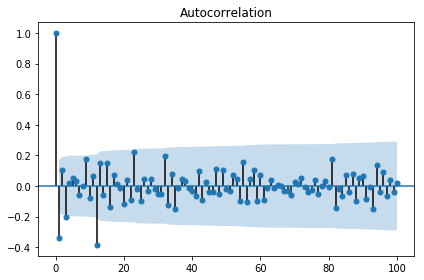

In [45]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%reload_ext autoreload
%autoreload 2
from module import stationarity_adf_test, stationarity_kpss_test

# 데이터 준비
data = sm.datasets.get_rdataset("AirPassengers")
raw = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in raw.columns:
    raw.index = pd.date_range(start='1/1/1949', periods=len(raw['time']), freq='M')
    del raw['time']

## 정상성 테스트
### 미변환
candidate_none = raw.copy()
display(stationarity_adf_test(candidate_none.values.flatten(), []))
display(stationarity_kpss_test(candidate_none.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그 변환
candidate_trend = np.log(raw).copy()
display(stationarity_adf_test(candidate_trend.values.flatten(), []))
display(stationarity_kpss_test(candidate_trend.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

trend_diff_order_initial = 0
result = stationarity_adf_test(candidate_trend.values.flatten(), []).T
if result['p-value'].values.flatten() < 0.1:
    trend_diff_order = trend_diff_order_initial
else:
    trend_diff_order = trend_diff_order_initial + 1
print('Trend Difference: ', trend_diff_order)

### 로그+추세차분 변환
candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_seasonal.values.flatten(), []))
display(stationarity_kpss_test(candidate_seasonal.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_seasonal, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

seasonal_diff_order = sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1
print('Seasonal Difference: ', seasonal_diff_order)

### 로그+추세차분+계절차분 변환
candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
display(stationarity_adf_test(candidate_final.values.flatten(), []))
display(stationarity_kpss_test(candidate_final.values.flatten(), []))
sm.graphics.tsa.plot_acf(candidate_final, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

In [ ]:
## 최종 타겟 선정 및 Train/Test 데이터 분리
candidate = candidate_trend.copy()
split_date = '1958-01-01'
Y_train = candidate[candidate.index < split_date]
Y_test = candidate[candidate.index >= split_date]

## 시각화 및 모수추론(p=1, q=0, d=1, P=1, Q=1, D(m)=12)
plt.figure(figsize=(14,4))
sm.tsa.graphics.plot_acf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(121))
sm.tsa.graphics.plot_pacf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(122))
plt.show()

# 모델링
## SARIMAX
logarithm, differencing = True, False
# fit_ts_sarimax = sm.tsa.SARIMAX(Y_train, order=(1,trend_diff_order,0), trend='ct').fit()
# fit_ts_sarimax = sm.tsa.SARIMAX(Y_train, order=(1,trend_diff_order,0), 
#                                 seasonal_order=(0,0,1,seasonal_diff_order), trend='c').fit()
# fit_ts_sarimax = sm.tsa.SARIMAX(Y_train, order=(1,trend_diff_order,0), 
#                                 seasonal_order=(1,0,0,seasonal_diff_order), trend='c').fit()
fit_ts_sarimax = sm.tsa.SARIMAX(Y_train, order=(1,trend_diff_order,0), 
                                seasonal_order=(1,0,1,seasonal_diff_order), trend='c').fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(Y_test)).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(Y_test)).conf_int()
## 비정상성으로 변환
if logarithm:
    Y_train = np.exp(Y_train).copy()
    Y_test = np.exp(Y_test).copy()
    pred_tr_ts_sarimax = np.exp(pred_tr_ts_sarimax).copy()
    pred_te_ts_sarimax = np.exp(pred_te_ts_sarimax).copy()
    pred_te_ts_sarimax_ci = np.exp(pred_te_ts_sarimax_ci).copy()
if differencing:
    pred_tr_ts_sarimax = np.cumsum(pred_tr_ts_sarimax).copy()
    
# 검증
%reload_ext autoreload
%autoreload 2
from module_KK import *
Score_ts_sarimax, Resid_tr_ts_sarimax, Resid_te_ts_sarimax = evaluation_trte(Y_train, pred_tr_ts_sarimax, 
                                                                             Y_test, pred_te_ts_sarimax, graph_on=True)
display(Score_ts_sarimax)
ax = pd.DataFrame(Y_test).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_sarimax, index=Y_test.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test.index.min(),Y_test.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test.index).index,
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_sarimax_ci, index=Y_test.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_sarimax, ['Error'], Y_train, graph_on=True)

In [ ]:
## 최종 타겟 선정 및 Train/Test 데이터 분리
candidate = candidate_trend.copy()
split_date = '1958-01-01'
Y_train = candidate[candidate.index < split_date]
Y_test = candidate[candidate.index >= split_date]

## 시각화 및 모수추론(p=1, q=0, d=1, P=1, Q=1, D(m)=12)
plt.figure(figsize=(14,4))
sm.tsa.graphics.plot_acf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(121))
sm.tsa.graphics.plot_pacf(Y_train, lags=50, alpha=0.05, use_vlines=True, ax=plt.subplot(122))
plt.show()

# 모델링
## Auto-ARIMA
logarithm, differencing = True, False
fit_ts_autoarima = auto_arima(Y_train, stationary=False,
                              trend='c', start_p=0, start_q=0, max_p=5, max_q=5, max_d=3,
                              seasonal=True, start_P=0, start_Q=0, max_P=5, max_Q=5, m=seasonal_diff_order,
                              stepwise=True, trace=True)
display(fit_ts_autoarima.summary())
pred_tr_ts_autoarima = fit_ts_autoarima.predict_in_sample()
pred_te_ts_autoarima = fit_ts_autoarima.predict(len(Y_test), return_conf_int=True)[0]
pred_te_ts_autoarima_ci = fit_ts_autoarima.predict(len(Y_test), return_conf_int=True)[1]
## 비정상성으로 변환
if logarithm:
    Y_train = np.exp(Y_train).copy()
    Y_test = np.exp(Y_test).copy()
    pred_tr_ts_autoarima = np.exp(pred_tr_ts_autoarima).copy()
    pred_te_ts_autoarima = np.exp(pred_te_ts_autoarima).copy()
    pred_te_ts_autoarima_ci = np.exp(pred_te_ts_autoarima_ci).copy()
if differencing:
    pred_tr_ts_autoarima = np.cumsum(pred_tr_ts_autoarima).copy()
    
# 검증
%reload_ext autoreload
%autoreload 2
from module_KK import *
Score_ts_autoarima, Resid_tr_ts_autoarima, Resid_te_ts_autoarima = evaluation_trte(Y_train, pred_tr_ts_autoarima, 
                                                                             Y_test, pred_te_ts_autoarima, graph_on=True)
display(Score_ts_autoarima)
ax = pd.DataFrame(Y_test).plot(figsize=(12,4))
pd.DataFrame(pred_te_ts_autoarima, index=Y_test.index, columns=['prediction']).plot(kind='line',
                                                                           xlim=(Y_test.index.min(),Y_test.index.max()),
                                                                           linewidth=3, fontsize=20, ax=ax)
ax.fill_between(pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test.index).index,
                pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test.index).iloc[:,0],
                pd.DataFrame(pred_te_ts_autoarima_ci, index=Y_test.index).iloc[:,1], color='k', alpha=0.15)
plt.show()

# 잔차진단
error_analysis(Resid_tr_ts_autoarima, ['Error'], Y_train, graph_on=True)
